In [773]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#https://www.w3schools.com/python/pandas/ref_df_describe.asp
#histograms & box plots @ https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/
#adding legend https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
import seaborn as sns
#import sys
#from datetime import datetime
#import csv
import pandas as pd
import plotly.express as px

# Introduction

## Read in C02 file and examine dataset

In [774]:
co2_nature = pd.read_excel('C02 Nature Paper.xlsx',sheet_name='3.  Composite CO2' ,skiprows=range(6))

co2_nature

EDC3_gas_a (yr)  CO2 (ppmv)
0                 137       280.4
1                 268       274.9
2                 279       277.9
3                 395       279.1
4                 404       281.9
...               ...         ...
1091           794608       199.4
1092           795202       195.2
1093           796467       189.3
1094           797099       188.4
1095           798512       191.0

[1096 rows x 2 columns]

In [775]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [776]:
co2_nature.describe()

EDC3_gas_a (yr)   CO2 (ppmv)
count      1096.000000  1096.000000
mean     390905.979015   230.835675
std      262092.947239    27.573616
min         137.000000   171.600000
25%      137133.500000   207.500000
50%      423206.500000   231.450000
75%      627408.000000   251.525000
max      798512.000000   298.600000

In [777]:
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'Nature')
plt.legend()
plt.show()

In [778]:
# Read the Excel file into a pandas DataFrame and exclude inital 14 rows
co2_ipcc = pd.read_excel('C02 IPCC Report.xlsx',sheet_name= 'CO2 Composite',skiprows=range(14))
co2_ipcc

Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)
0          -51.030000  368.022488               0.060442
1          -48.000000  361.780737               0.370000
2          -46.279272  359.647793               0.098000
3          -44.405642  357.106740               0.159923
4          -43.080000  353.946685               0.043007
...               ...         ...                    ...
1896    803925.284376  202.921723               2.064488
1897    804009.870607  207.498645               0.915083
1898    804522.674630  204.861938               1.642851
1899    805132.442334  202.226839               0.689587
1900    805668.868405  207.285440               2.202808

[1901 rows x 3 columns]

In [779]:
co2_ipcc.columns = co2_ipcc.columns.str.lstrip()
co2_ipcc.columns = co2_ipcc.columns.str.rstrip()

In [780]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [781]:
co2_nature.describe()

EDC3_gas_a (yr)   CO2 (ppmv)
count      1096.000000  1096.000000
mean     390905.979015   230.835675
std      262092.947239    27.573616
min         137.000000   171.600000
25%      137133.500000   207.500000
50%      423206.500000   231.450000
75%      627408.000000   251.525000
max      798512.000000   298.600000

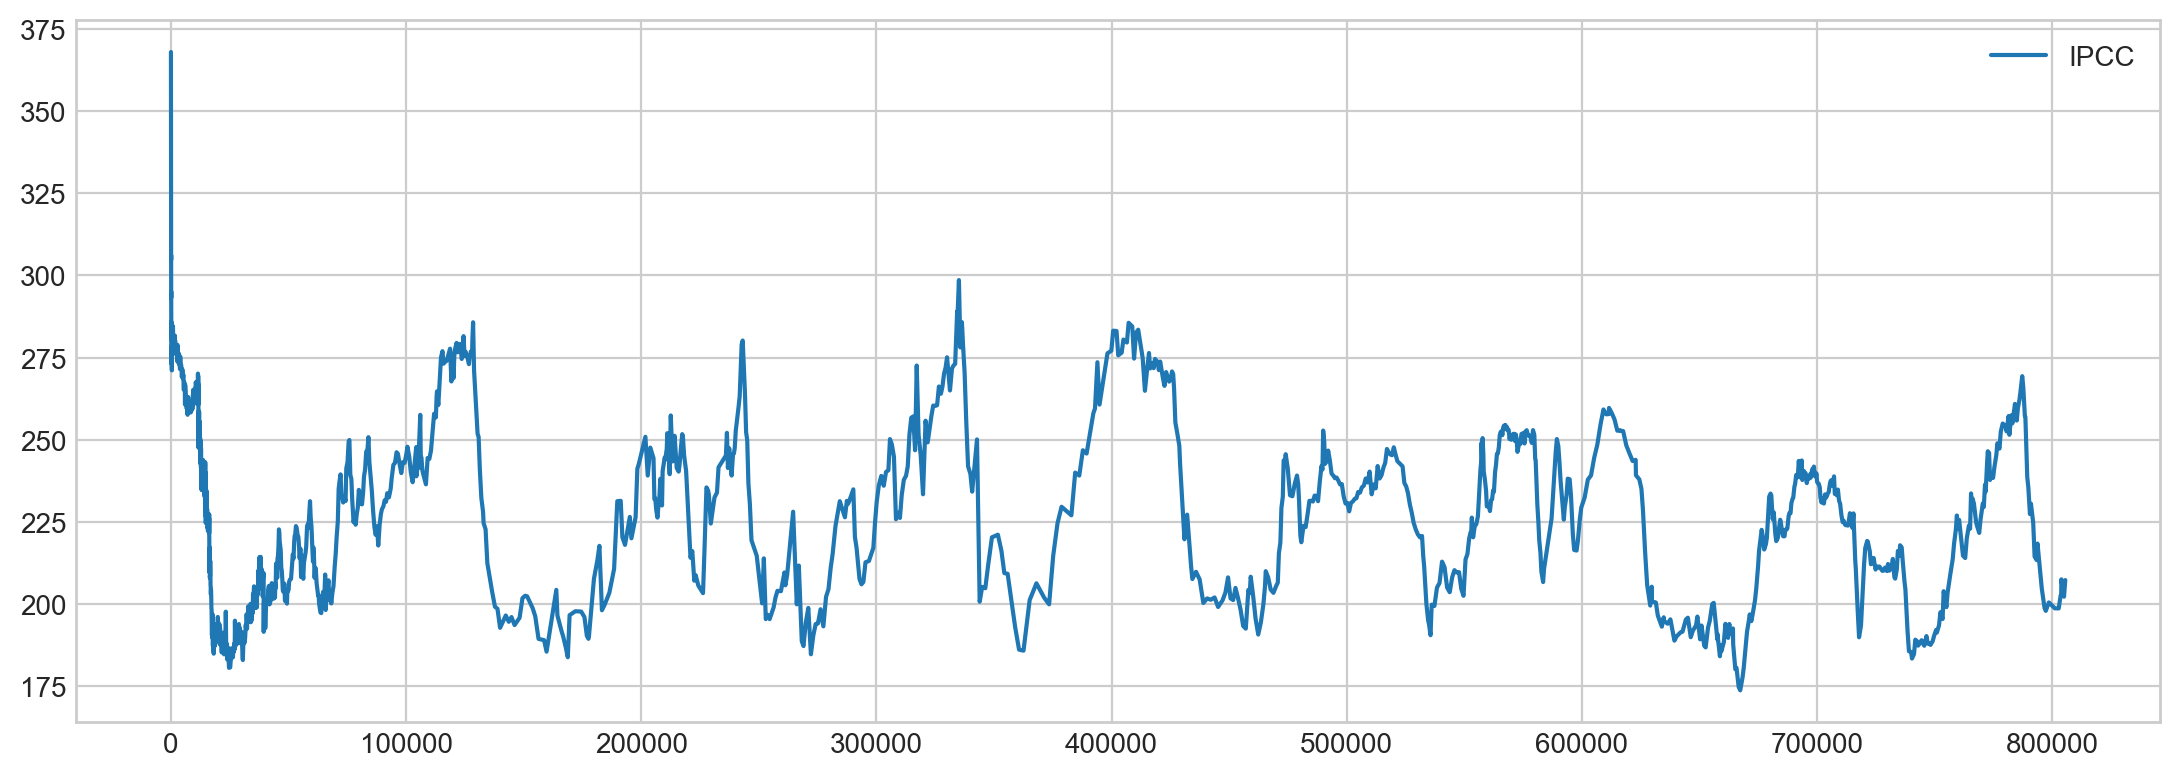

In [782]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'],label = 'IPCC')
plt.legend()
plt.show()

Remove blank spaces at beginning and end of string https://stackoverflow.com/questions/41476150/remove-or-replace-spaces-in-column-names

### Comparision of both C02 Datasets

In [783]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'], label = 'Nature')
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'IPCC')
plt.legend()
plt.show()

### Mauna Loa CO2 dataset

In [784]:
co2_mauna_loa=pd.read_csv('Mauna Loa CO2.csv',skiprows=range(43))
co2_mauna_loa

year    mean   unc
0   1959  315.98  0.12
1   1960  316.91  0.12
2   1961  317.64  0.12
3   1962  318.45  0.12
4   1963  318.99  0.12
..   ...     ...   ...
59  2018  408.72  0.12
60  2019  411.65  0.12
61  2020  414.21  0.12
62  2021  416.41  0.12
63  2022  418.53  0.12

[64 rows x 3 columns]

In [785]:
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'year':'EDC3_gas_a (yr)'})))
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'mean':'CO2 (ppmv)'})))

In [786]:
co2_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
unc                float64
dtype: object

In [787]:
co2_mauna_loa.describe()

EDC3_gas_a (yr)  CO2 (ppmv)           unc
count        64.000000   64.000000  6.400000e+01
mean       1990.500000  358.293437  1.200000e-01
std          18.618987   30.580414  9.791247e-17
min        1959.000000  315.980000  1.200000e-01
25%        1974.750000  330.895000  1.200000e-01
50%        1990.500000  355.075000  1.200000e-01
75%        2006.250000  382.572500  1.200000e-01
max        2022.000000  418.530000  1.200000e-01

Converting Mauna Loa data to match format of Nature CO2 dataset

In [788]:
co2_mauna_loa.columns = co2_mauna_loa.columns.str.lstrip()
co2_mauna_loa.columns = co2_mauna_loa.columns.str.rstrip()

In [789]:
base = 1950
co2_mauna_loa['EDC3_gas_a (yr)'] = base - co2_mauna_loa['EDC3_gas_a (yr)']

In [790]:
co2_mauna_loa

EDC3_gas_a (yr)  CO2 (ppmv)   unc
0                -9      315.98  0.12
1               -10      316.91  0.12
2               -11      317.64  0.12
3               -12      318.45  0.12
4               -13      318.99  0.12
..              ...         ...   ...
59              -68      408.72  0.12
60              -69      411.65  0.12
61              -70      414.21  0.12
62              -71      416.41  0.12
63              -72      418.53  0.12

[64 rows x 3 columns]

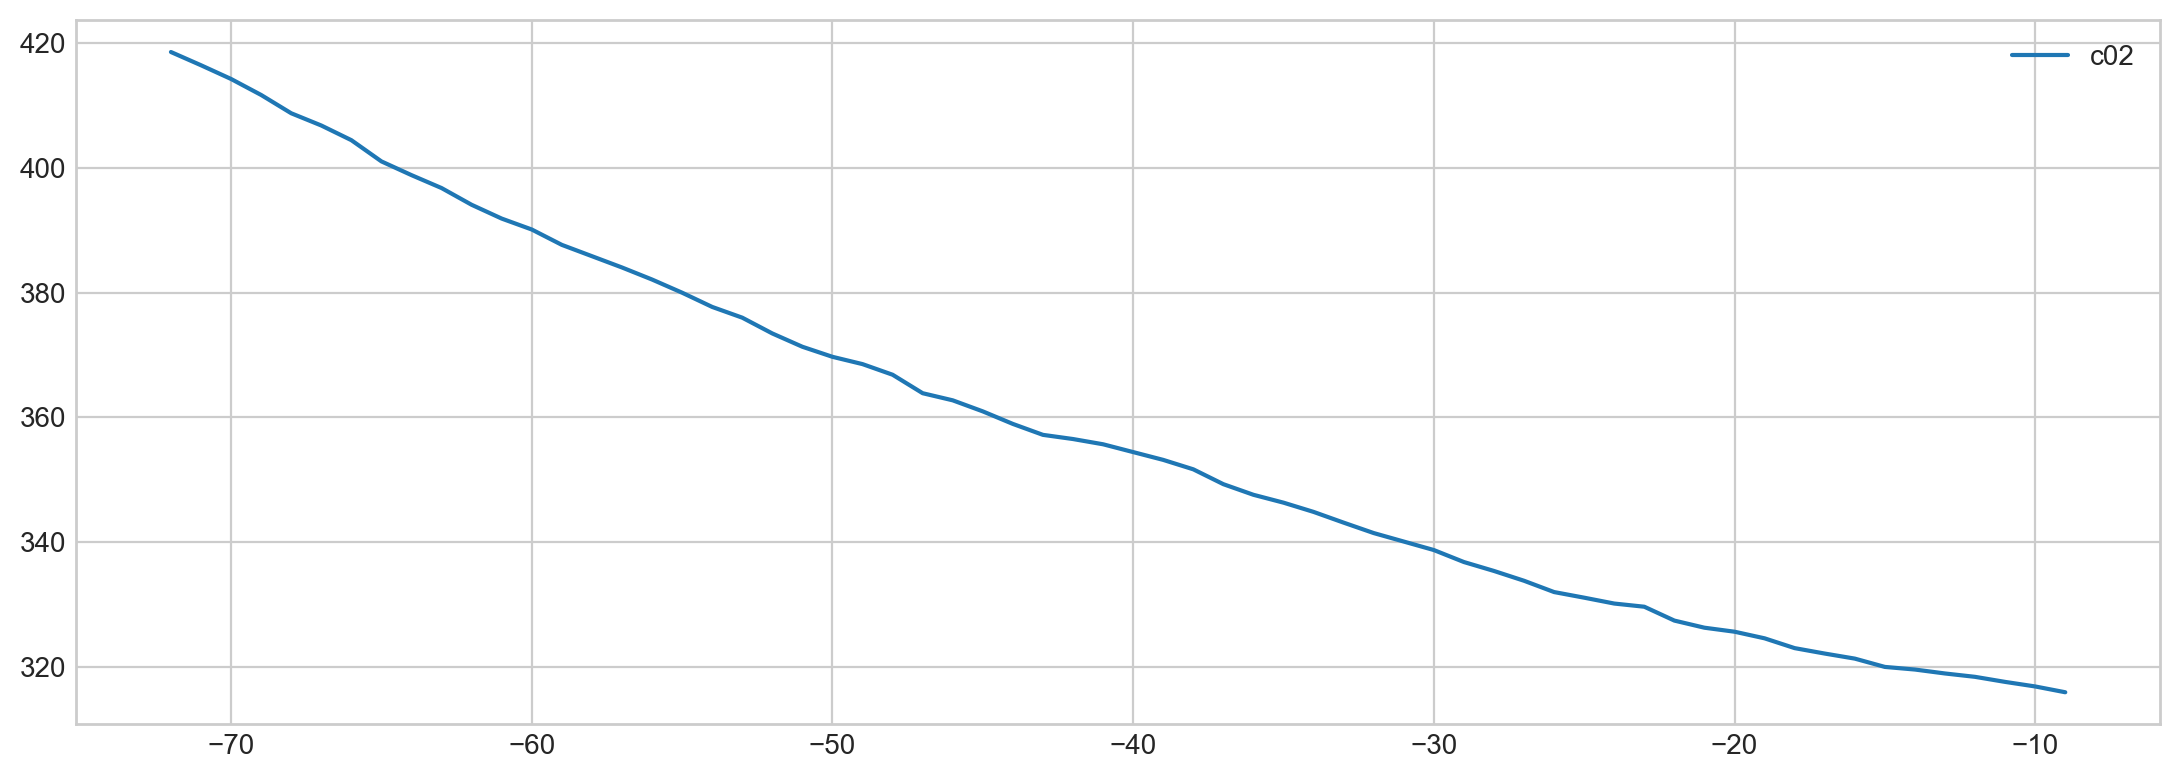

In [791]:
plt.plot(co2_mauna_loa['EDC3_gas_a (yr)'],co2_mauna_loa['CO2 (ppmv)'] ,label ='c02')
plt.legend()
plt.show()


In [792]:
co2_mauna_loa.columns = co2_mauna_loa.columns.str.lstrip()
co2_mauna_loa.columns = co2_mauna_loa.columns.str.rstrip()

In [793]:
co2_mauna_loa

EDC3_gas_a (yr)  CO2 (ppmv)   unc
0                -9      315.98  0.12
1               -10      316.91  0.12
2               -11      317.64  0.12
3               -12      318.45  0.12
4               -13      318.99  0.12
..              ...         ...   ...
59              -68      408.72  0.12
60              -69      411.65  0.12
61              -70      414.21  0.12
62              -71      416.41  0.12
63              -72      418.53  0.12

[64 rows x 3 columns]

comparing datasets before merging to ensure compatabillity

In [794]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [795]:
co2_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
unc                float64
dtype: object

In [796]:
co2_nature_mauna_loa = pd.concat([co2_mauna_loa, co2_nature])
co2_nature_mauna_loa = co2_nature_mauna_loa.drop(['unc'],axis =1)

In [797]:
co2_nature_mauna_loa

EDC3_gas_a (yr)  CO2 (ppmv)
0                  -9      315.98
1                 -10      316.91
2                 -11      317.64
3                 -12      318.45
4                 -13      318.99
...               ...         ...
1091           794608      199.40
1092           795202      195.20
1093           796467      189.30
1094           797099      188.40
1095           798512      191.00

[1160 rows x 2 columns]

In [798]:
co2_nature_mauna_loa

EDC3_gas_a (yr)  CO2 (ppmv)
0                  -9      315.98
1                 -10      316.91
2                 -11      317.64
3                 -12      318.45
4                 -13      318.99
...               ...         ...
1091           794608      199.40
1092           795202      195.20
1093           796467      189.30
1094           797099      188.40
1095           798512      191.00

[1160 rows x 2 columns]

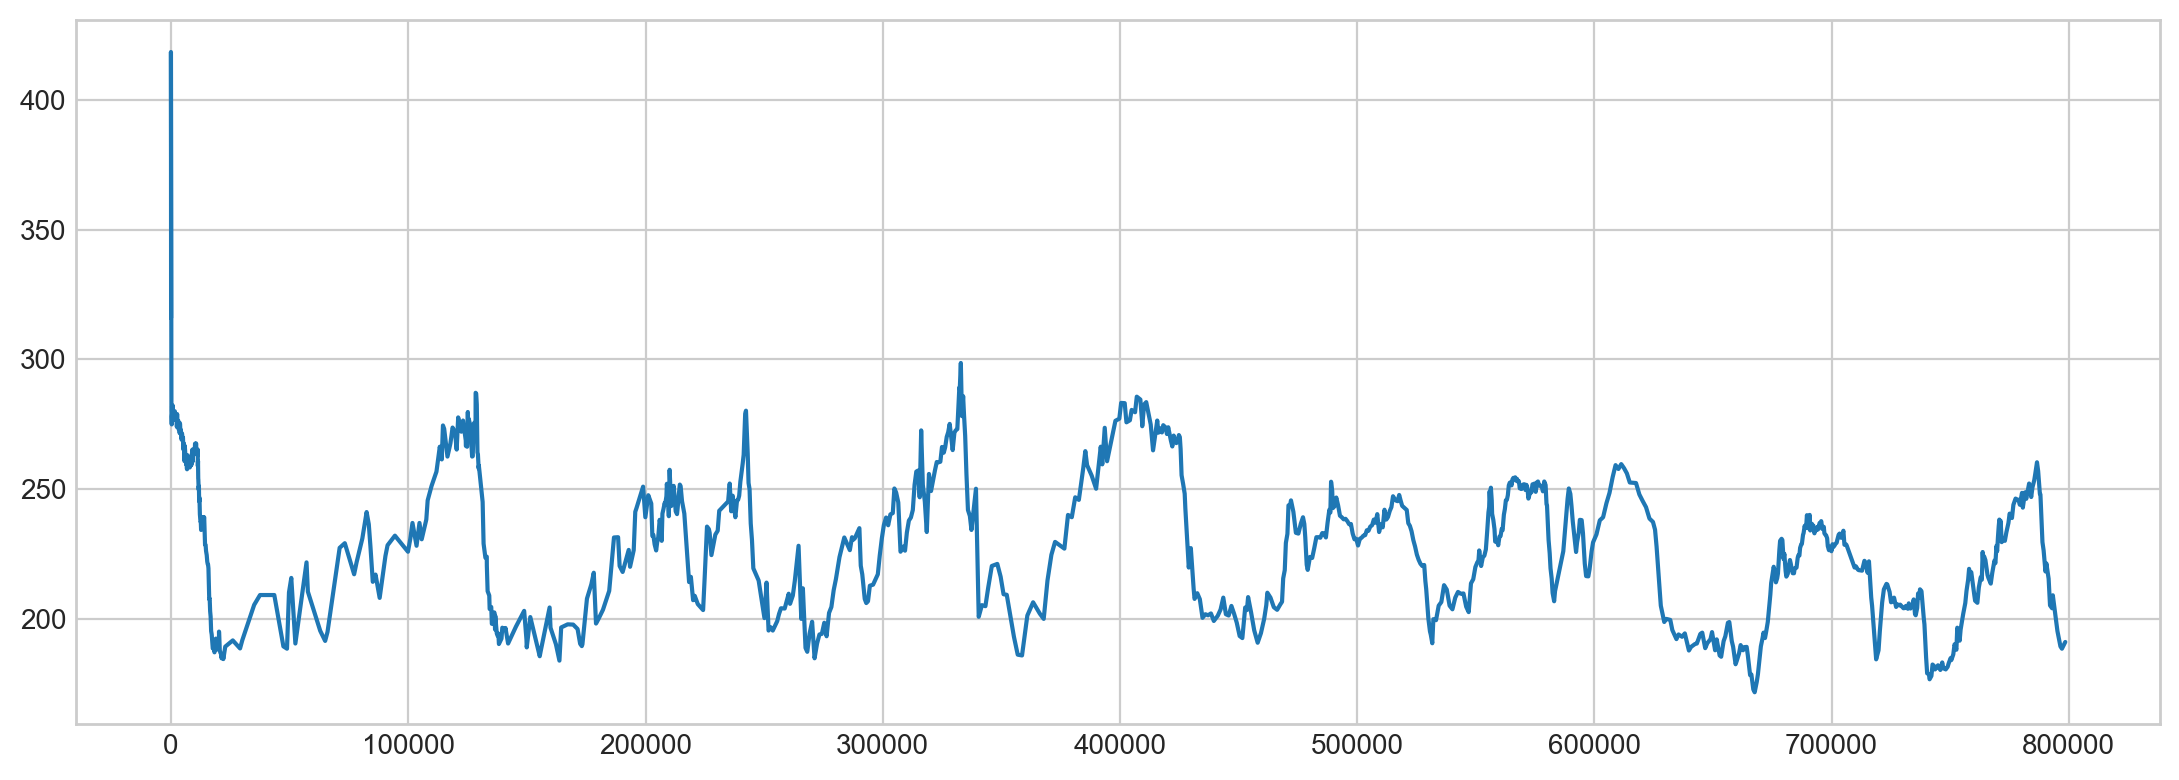

In [799]:
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'])
plt.show()

In [800]:
co2_nature_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [801]:
co2_nature_mauna_loa.describe()

EDC3_gas_a (yr)   CO2 (ppmv)
count      1160.000000  1160.000000
mean     369336.518103   237.867828
std      269951.176372    40.208643
min         -72.000000   171.600000
25%      114474.750000   208.875000
50%      390921.000000   233.800000
75%      608013.250000   257.250000
max      798512.000000   418.530000

In [802]:
co2_nature_mauna_loa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1160 non-null   int64  
 1   CO2 (ppmv)       1160 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 27.2 KB


# Reading in Temperature data

In [803]:
temp_jouzel=pd.read_csv('Temp Data Jouzel.csv',encoding='Latin')
temp_jouzel

bag     ztop      EDC3béta       AICC2012  deutfinal   temp  \
0        1     0.00     -50.00000     -55.000000        NaN  218.3   
1        2     0.55     -43.55977     -50.513333        NaN  218.3   
2        3     1.10     -37.44019     -46.026667        NaN  218.3   
3        4     1.65     -31.64156     -41.540000        NaN  218.3   
4        5     2.20     -24.55278     -34.516667        NaN  218.3   
...    ...      ...           ...            ...        ...    ...   
5814  5815  3197.70  816871.60000  817562.000000     -432.2  211.0   
5815  5816  3198.25  817693.60000  818631.000000     -431.4  211.2   
5816  5817  3198.80  818505.50000  819700.000000     -430.3  211.3   
5817  5818  3199.35  819303.10000  820769.000000     -429.8  211.4   
5818  5819  3199.90  820093.90000  821838.000000     -430.0  211.4   

      acc-EDC3beta  
0         3.105321  
1         3.104805  
2         3.104404  
3         3.104025  
4         3.103453  
...            ...  
5814      1.529000  
5815      1.548000  
5816      1.576000  
5817      1.589000  
5818      1.583000  

[5819 rows x 7 columns]

adding new column called differnce in order to comapare NOAA dataset and Jouzel dataset. once plotted, calculation is temp value from Jouzel minus *218.32 which gives .88 anomaly value in NOAA dataset

In [804]:
temp_jouzel['difference'] = temp_jouzel['temp'] - 218.32
temp_jouzel

bag     ztop      EDC3béta       AICC2012  deutfinal   temp  \
0        1     0.00     -50.00000     -55.000000        NaN  218.3   
1        2     0.55     -43.55977     -50.513333        NaN  218.3   
2        3     1.10     -37.44019     -46.026667        NaN  218.3   
3        4     1.65     -31.64156     -41.540000        NaN  218.3   
4        5     2.20     -24.55278     -34.516667        NaN  218.3   
...    ...      ...           ...            ...        ...    ...   
5814  5815  3197.70  816871.60000  817562.000000     -432.2  211.0   
5815  5816  3198.25  817693.60000  818631.000000     -431.4  211.2   
5816  5817  3198.80  818505.50000  819700.000000     -430.3  211.3   
5817  5818  3199.35  819303.10000  820769.000000     -429.8  211.4   
5818  5819  3199.90  820093.90000  821838.000000     -430.0  211.4   

      acc-EDC3beta  difference  
0         3.105321       -0.02  
1         3.104805       -0.02  
2         3.104404       -0.02  
3         3.104025       -0.02  
4         3.103453       -0.02  
...            ...         ...  
5814      1.529000       -7.32  
5815      1.548000       -7.12  
5816      1.576000       -7.02  
5817      1.589000       -6.92  
5818      1.583000       -6.92  

[5819 rows x 8 columns]

In [805]:
temp_jouzel['celsius'] = temp_jouzel['temp'] - 273.15

In [806]:
temp_jouzel.dtypes

bag               int64
ztop            float64
EDC3béta        float64
AICC2012        float64
deutfinal       float64
temp            float64
acc-EDC3beta    float64
difference      float64
celsius         float64
dtype: object

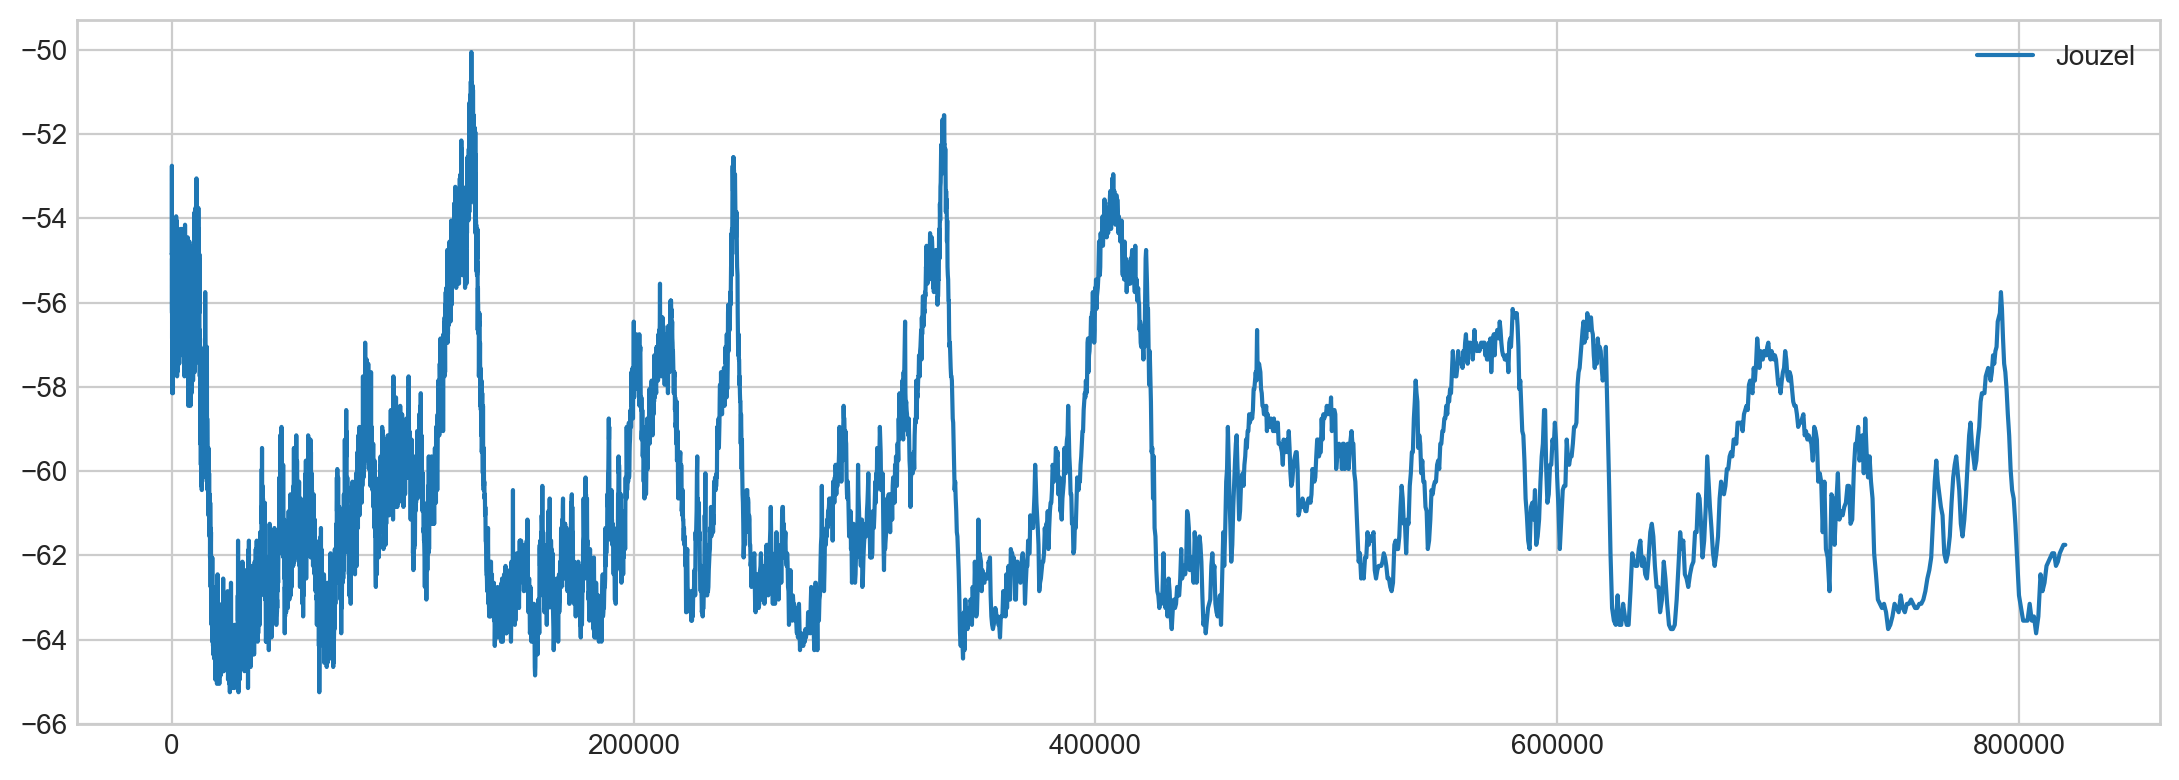

In [807]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'Jouzel')
plt.legend()
plt.show()

In [808]:
temp_noaa=pd.read_csv('Temp data NOAA.csv',skiprows=range(91),delimiter=r"\s+")
temp_noaa2=temp_noaa.dropna()

In [809]:
temp_noaa2

Bag     ztop           Age  Deuterium  Temperature
12      13     6.60      38.37379    -390.90         0.88
13      14     7.15      46.81203    -385.10         1.84
14      15     7.70      55.05624    -377.80         3.04
15      16     8.25      64.41511    -394.10         0.35
16      17     8.80      73.15077    -398.70        -0.42
...    ...      ...           ...        ...          ...
5795  5796  3187.25  797408.00000    -440.20        -8.73
5796  5797  3187.80  798443.00000    -439.00        -8.54
5797  5798  3188.35  799501.00000    -441.10        -8.88
5798  5799  3188.90  800589.00000    -441.42        -8.92
5799  5800  3189.45  801662.00000    -440.90        -8.82

[5785 rows x 5 columns]

In [810]:
temp_noaa.describe()

Bag         ztop            Age    Deuterium  Temperature
count  5800.000000  5800.000000    5800.000000  5788.000000  5785.000000
mean   2900.500000  1594.725000  190016.390617  -417.579610    -4.580228
std    1674.460112   920.953062  192546.207239    20.359332     3.446971
min       1.000000     0.000000     -50.000000  -449.500000   -10.580000
25%    1450.750000   797.362500   46330.569350  -432.500000    -7.450000
50%    2900.500000  1594.725000  121793.340000  -421.300000    -5.200000
75%    4350.250000  2392.087500  272456.740000  -403.200000    -1.820000
max    5800.000000  3189.450000  801662.000000     0.950000     5.460000

In [811]:
temp_noaa.dtypes

Bag              int64
ztop           float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object

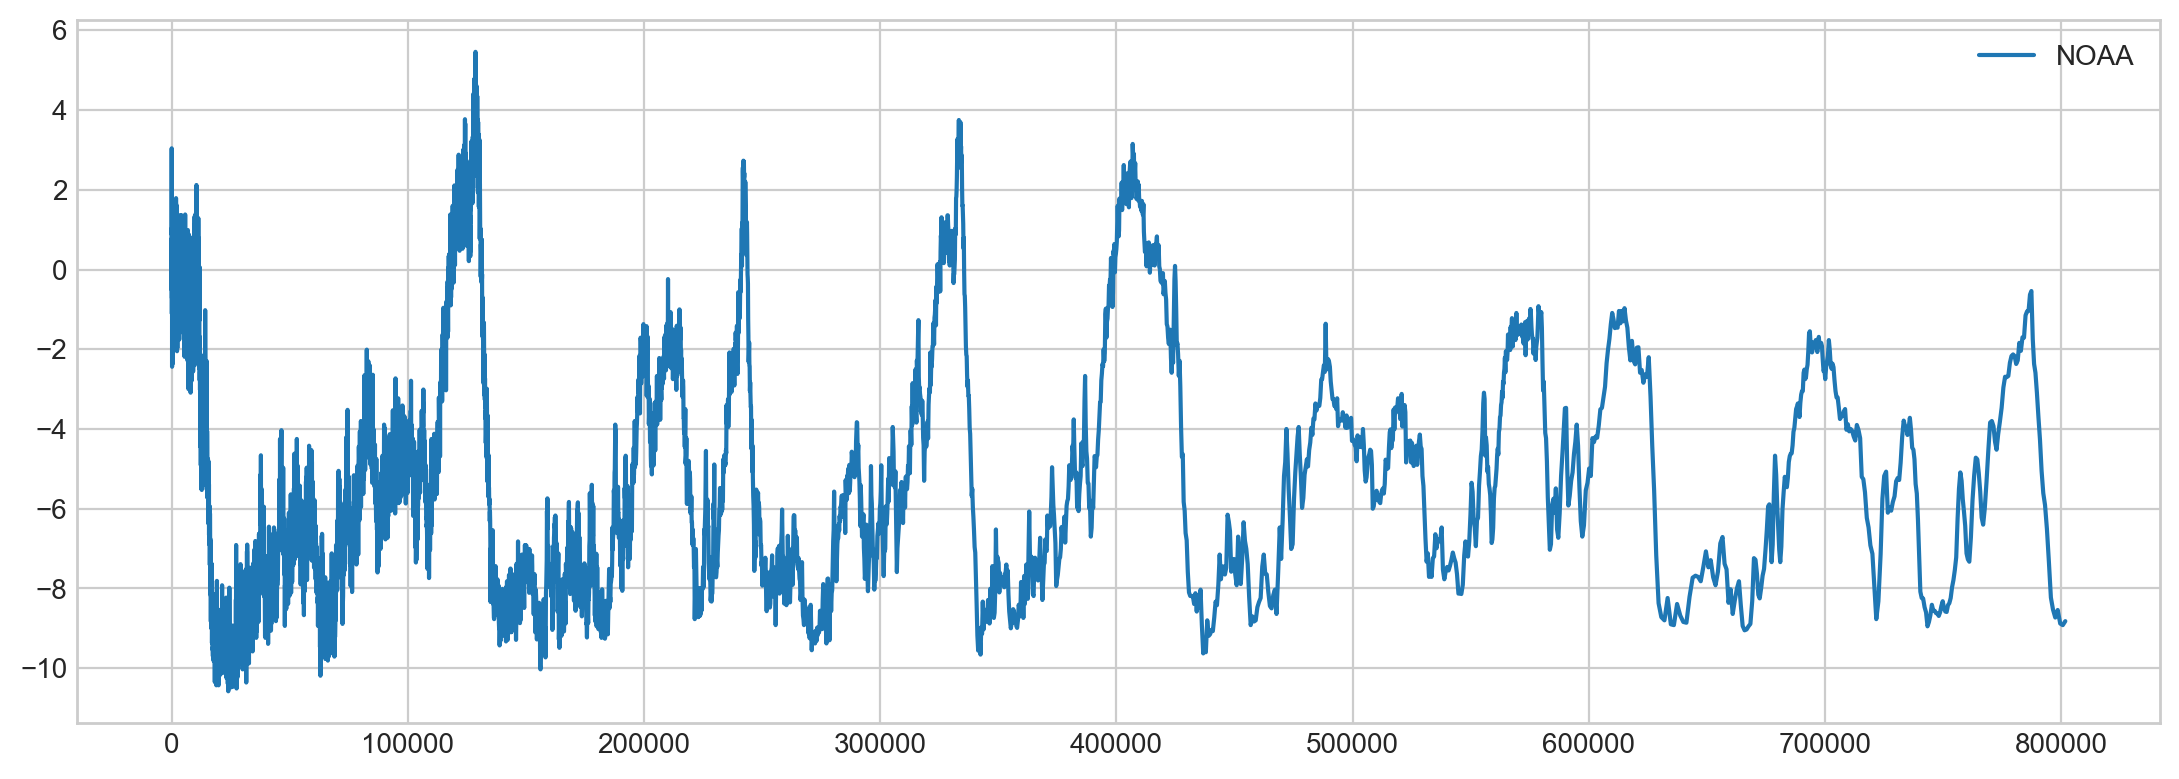

In [812]:
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

In [813]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['difference'], label = 'jOUZEL')
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

# Read in Irish weather

In [814]:
comp_irish_rainfall=pd.read_csv('Composite Rainfall Ireland.csv')


In [815]:
comp_irish_rainfall

Year  Month  Median montly series
0     1711      1                  16.4
1     1711      2                  73.1
2     1711      3                 121.2
3     1711      4                  85.2
4     1711      5                  66.6
...    ...    ...                   ...
3667  2016      8                  79.1
3668  2016      9                 108.1
3669  2016     10                  51.8
3670  2016     11                  58.0
3671  2016     12                  92.1

[3672 rows x 3 columns]

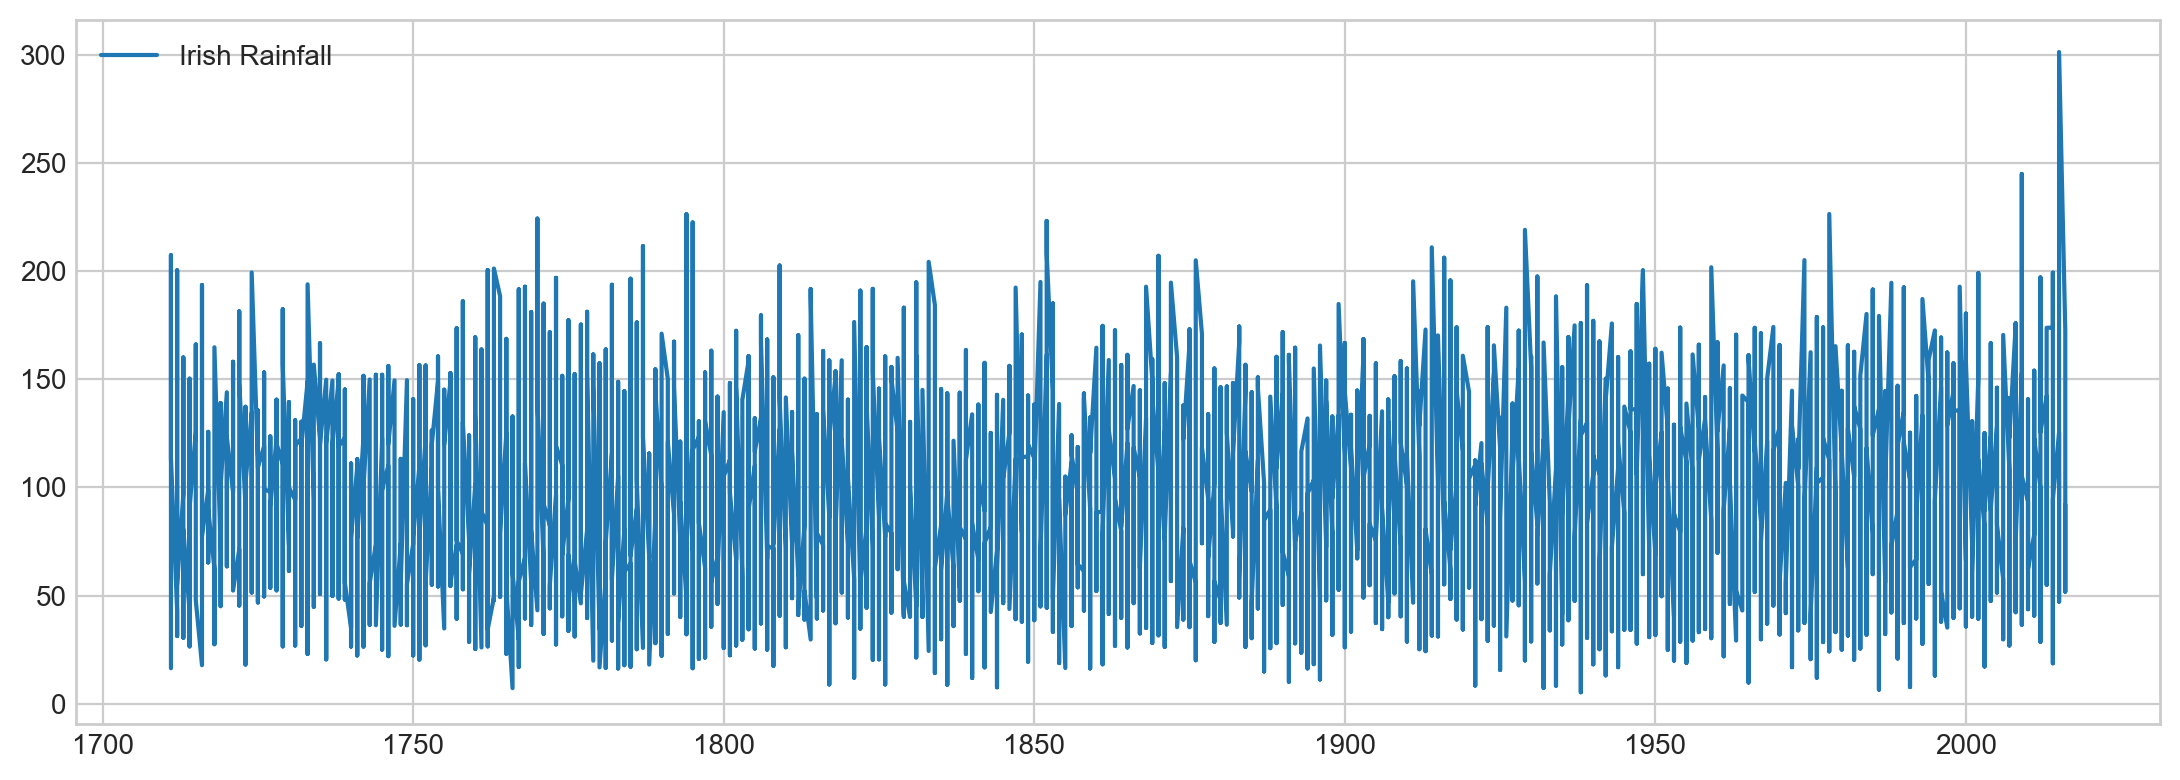

In [816]:
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Rainfall')
plt.legend()
plt.show()

### above graph messy so going to get yearly average

In [817]:
mean_yearly_irish_rainfall=comp_irish_rainfall

In [818]:
print(mean_yearly_irish_rainfall.head())

   Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1
2  1711      3                 121.2
3  1711      4                  85.2
4  1711      5                  66.6


In [819]:
yearly_averages = mean_yearly_irish_rainfall.groupby('Year')['Median montly series'].mean()
print(yearly_averages)

Year
1711     90.966667
1712    104.383333
1713     81.875000
1714     73.683333
1715    104.833333
           ...    
2012     98.641667
2013     93.041667
2014    105.225000
2015    112.166667
2016     88.391667
Name: Median montly series, Length: 306, dtype: float64


In [820]:
plt.plot(yearly_averages, label='Yearly Averages')

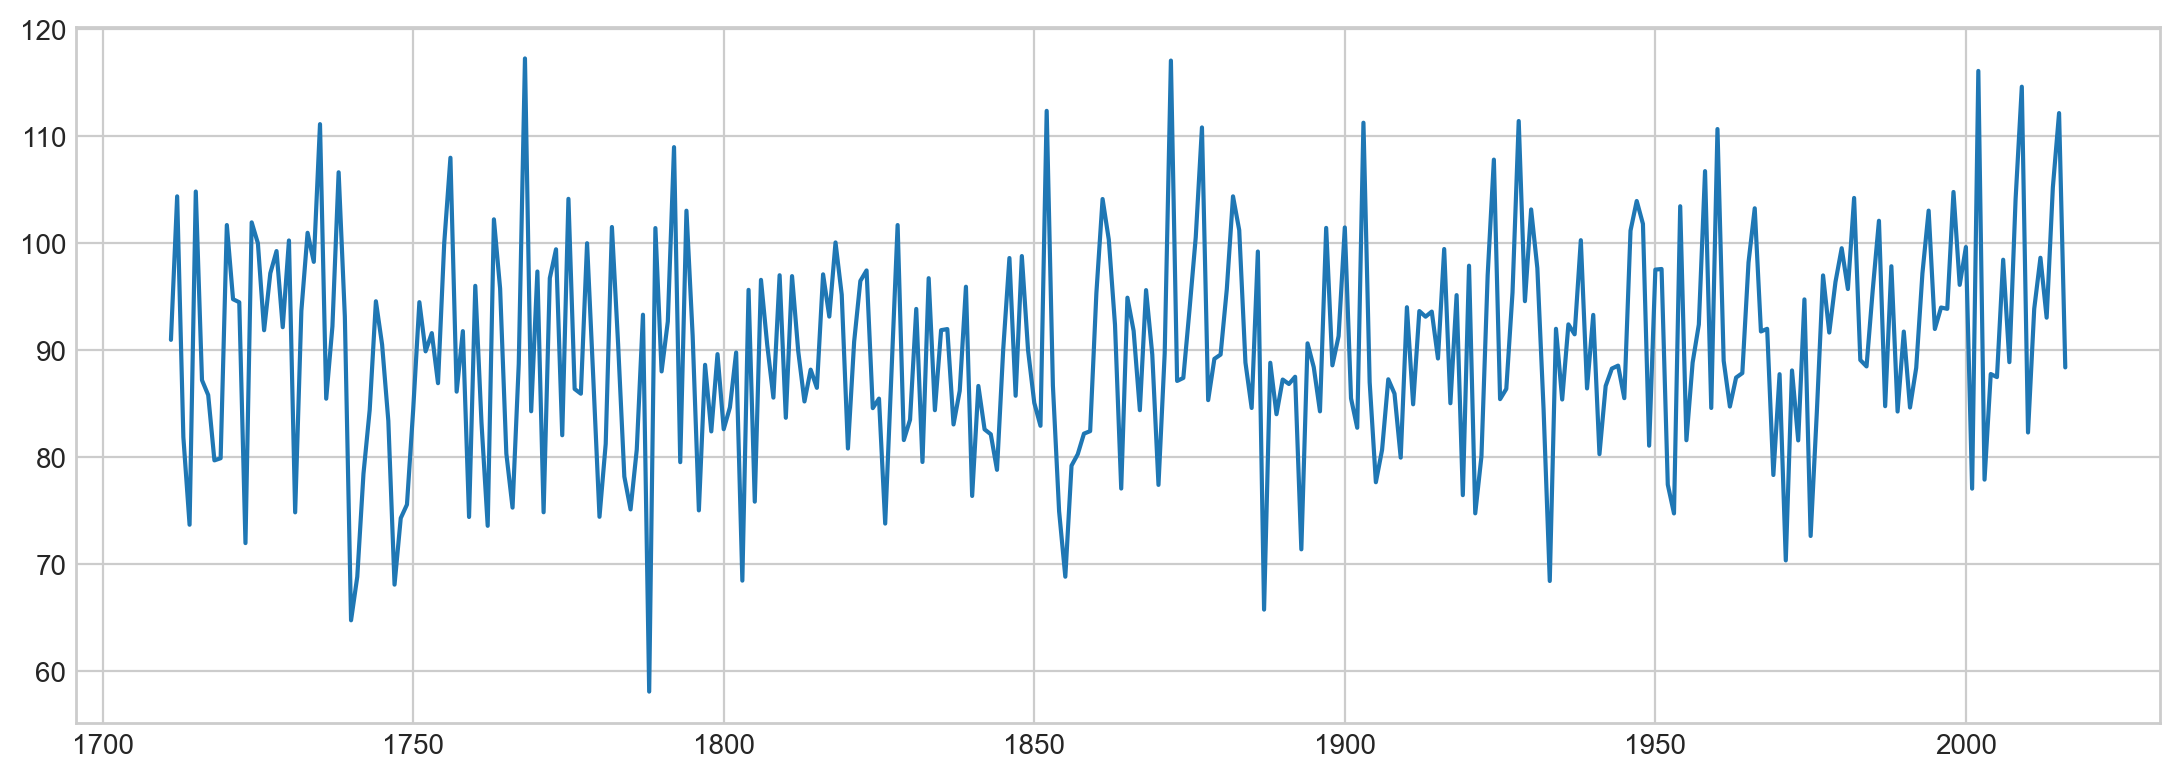

In [821]:
plt.plot(yearly_averages, label='Yearly Averages')

In [822]:
irish_temp=pd.read_csv('Ireland MeanTemperatures_1900-2022_annual.csv')

In [823]:
irish_temp

year  Annual
0    2022    10.9
1    2021    10.5
2    2020    10.4
3    2019    10.5
4    2018    10.3
..    ...     ...
118  1904     9.1
119  1903     9.1
120  1902     9.2
121  1901     9.1
122  1900     9.3

[123 rows x 2 columns]

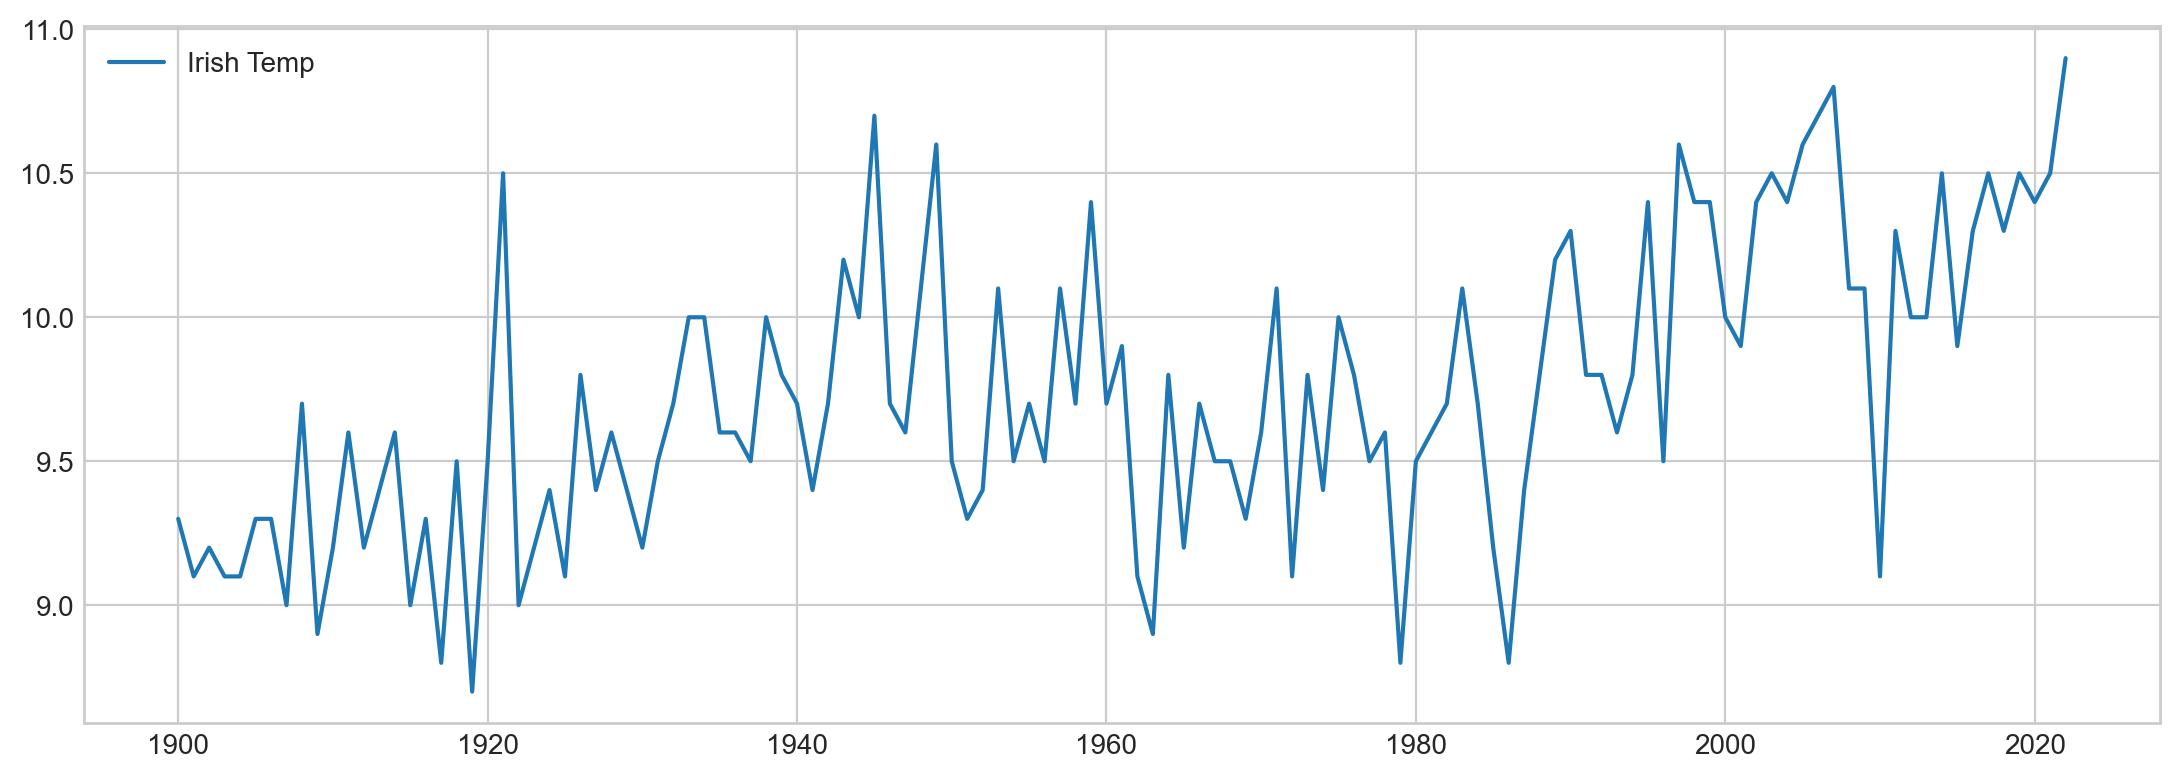

In [824]:
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.legend()
plt.show()

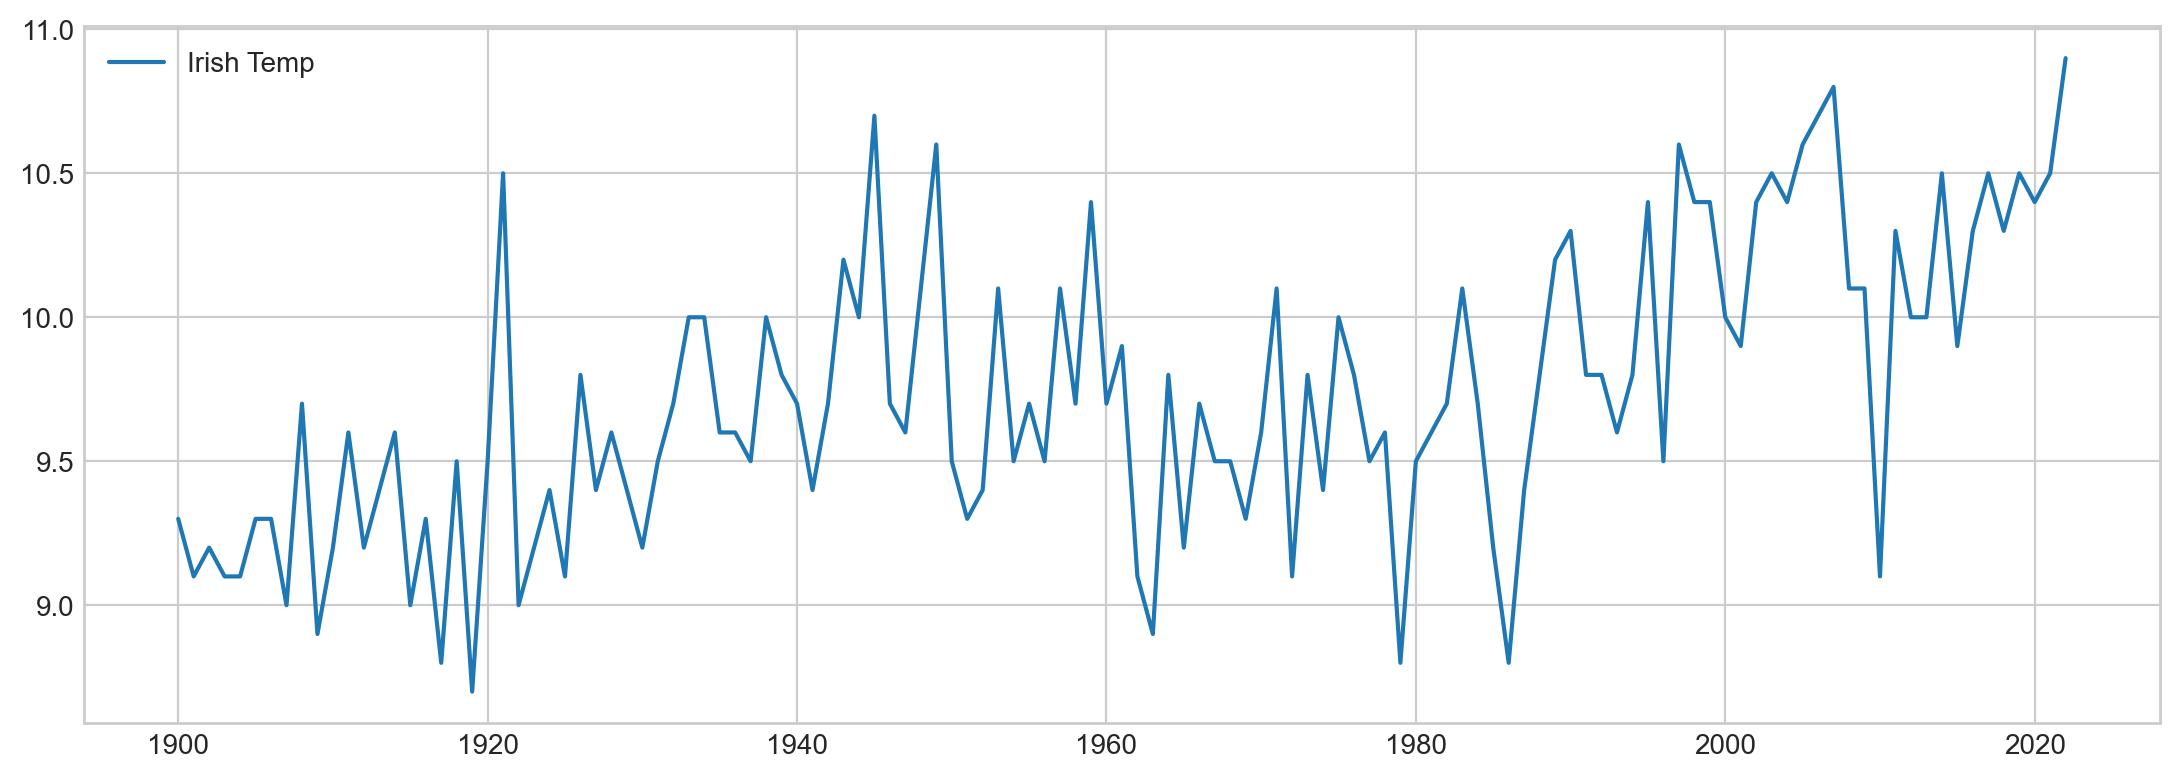

In [825]:
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.legend()
plt.show()

# Methane
https://data.world/datasets/methane

In [826]:
df17=pd.read_csv('Methane.csv',encoding='Latin')
df17

EDC1999 depth  gas age (edc3_gas_a)  CH4 mean  1 s uncertainty  \
0             99.34                    13       907             10.0   
1            102.45                   126       784             10.0   
2            102.58                   130       762             10.0   
3            103.34                   151       710             10.0   
4            104.33                   184       727             10.0   
...             ...                   ...       ...              ...   
2098        3188.08                794938       428             10.0   
2099        3188.95                796320       418             10.0   
2100        3189.43                797277       396             10.0   
2101        3190.03                798417       458             10.0   
2102        3190.53                799396       399             10.0   

     Bern, Grenoble  
0                 b  
1                 g  
2                 b  
3                 g  
4                 g  
...             ...  
2098              g  
2099              b  
2100              g  
2101              g  
2102              g  

[2103 rows x 5 columns]

In [827]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt
methane_noaa=pd.read_csv('Methane NOAA.csv',encoding='Latin',delimiter=r"\s+")

In [828]:
methane_noaa.columns = methane_noaa.columns.str.lstrip()
methane_noaa.columns = methane_noaa.columns.str.rstrip()

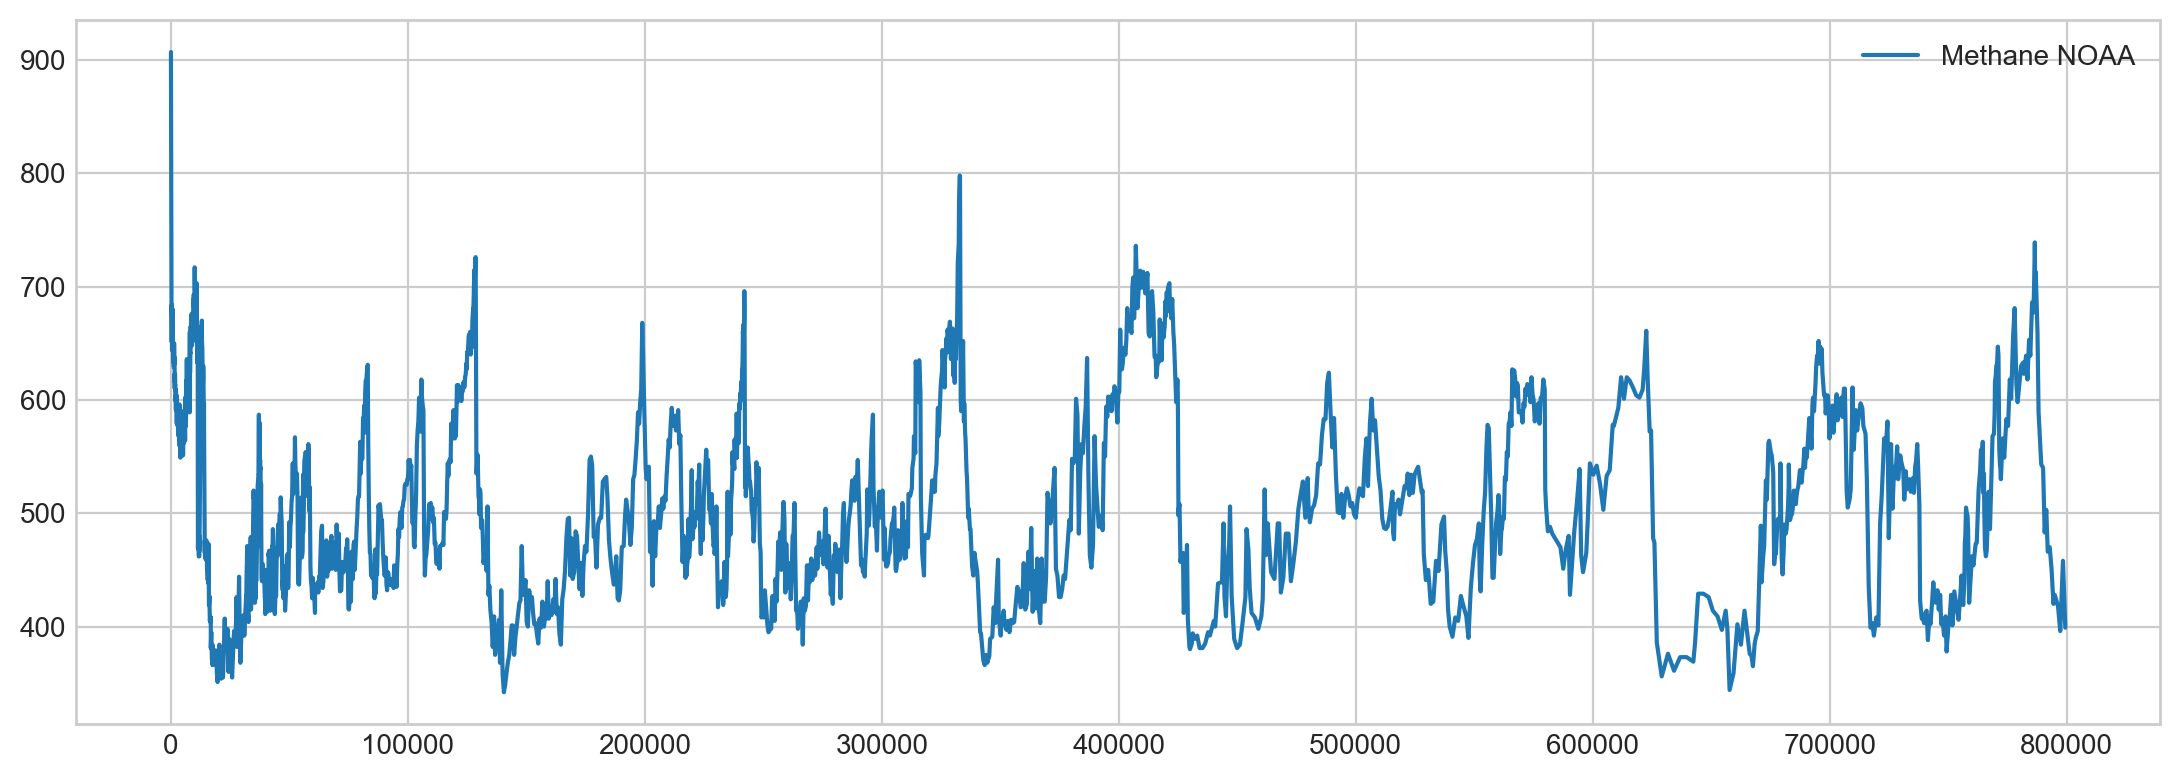

In [829]:
plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane NOAA')
plt.legend()
plt.show()

In [830]:
methane_noaa.dtypes

ï»¿Depth    float64
Age           int64
CH4_mean      int64
1s          float64
Lab.         object
dtype: object

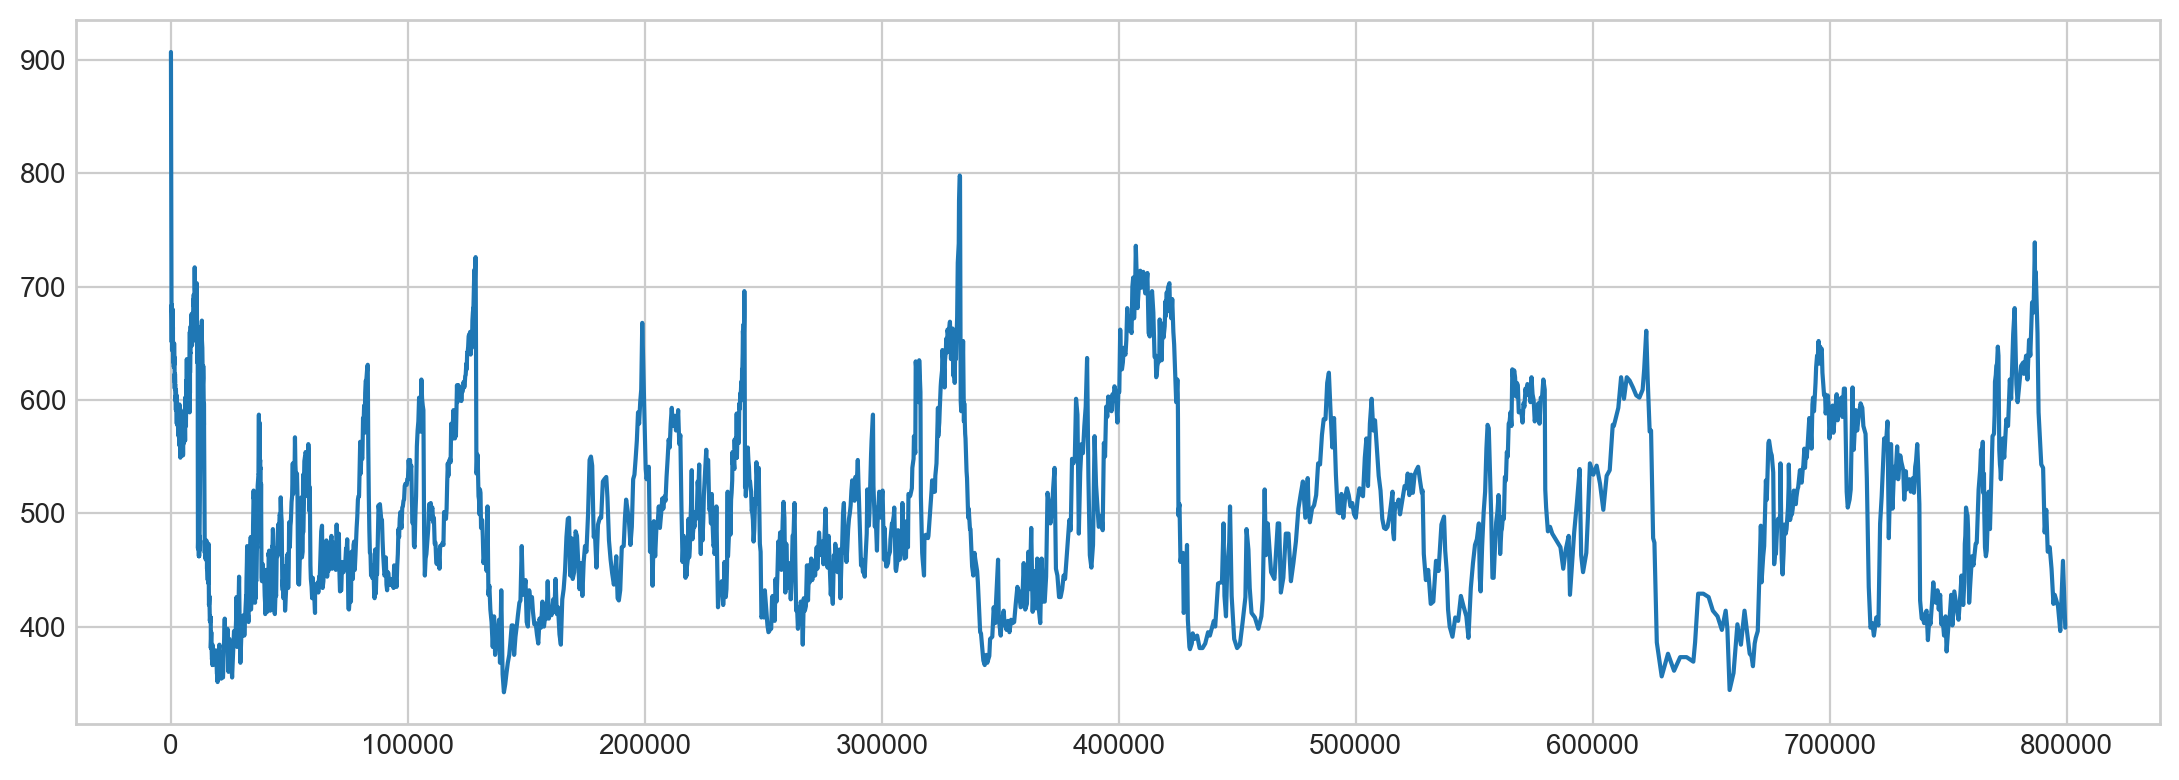

In [831]:
plt.plot(methane_noaa['Age'],methane_noaa['CH4_mean'], label = 'Methane')

In [832]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

#https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
#df1=pd.read_csv('summary.csv',delimiter=r"\s+")
#df1 = pd.read_csv("deter.csv",sep = " ")
#df1.describe()
#print(df1['Bag'])


In [833]:
result=pd.concat([co2_nature,co2_ipcc,temp_noaa,temp_jouzel,co2_mauna_loa],axis =1)
print(result)

      EDC3_gas_a (yr)  CO2 (ppmv)  Gasage (yr BP)  CO2 (ppmv)  \
0               137.0       280.4      -51.030000  368.022488   
1               268.0       274.9      -48.000000  361.780737   
2               279.0       277.9      -46.279272  359.647793   
3               395.0       279.1      -44.405642  357.106740   
4               404.0       281.9      -43.080000  353.946685   
...               ...         ...             ...         ...   
5814              NaN         NaN             NaN         NaN   
5815              NaN         NaN             NaN         NaN   
5816              NaN         NaN             NaN         NaN   
5817              NaN         NaN             NaN         NaN   
5818              NaN         NaN             NaN         NaN   

      sigma mean CO2 (ppmv)  Bag  ztop       Age  Deuterium  Temperature  ...  \
0                  0.060442  1.0  0.00 -50.00000        NaN          NaN  ...   
1                  0.370000  2.0  0.55 -43.54769        N

In [834]:
#https://researchdatapod.com/how-to-solve-python-typeerror-object-of-type-dataframe-is-not-json-serializable/
import json
json_str = result.to_csv()
with open('data.json', 'w') as f:
    json.dump(json_str, f)

In [835]:
merged1 = pd.concat([df17])

In [836]:
merged1['blank1'] = 'SPACE'

In [837]:
merged2 = pd.concat([co2_nature,merged1,co2_ipcc,merged1,co2_mauna_loa,merged1,temp_noaa,merged1,temp_jouzel,merged1,comp_irish_rainfall,merged1,mean_yearly_irish_rainfall,merged1,irish_temp,merged1,methane_noaa],axis =1)

In [838]:
merged2

EDC3_gas_a (yr)  CO2 (ppmv)  EDC1999 depth  gas age (edc3_gas_a)  \
0               137.0       280.4          99.34                  13.0   
1               268.0       274.9         102.45                 126.0   
2               279.0       277.9         102.58                 130.0   
3               395.0       279.1         103.34                 151.0   
4               404.0       281.9         104.33                 184.0   
...               ...         ...            ...                   ...   
5814              NaN         NaN            NaN                   NaN   
5815              NaN         NaN            NaN                   NaN   
5816              NaN         NaN            NaN                   NaN   
5817              NaN         NaN            NaN                   NaN   
5818              NaN         NaN            NaN                   NaN   

      CH4 mean  1 s uncertainty  Bern, Grenoble  blank1  Gasage (yr BP)  \
0        907.0             10.0               b   SPACE      -51.030000   
1        784.0             10.0               g   SPACE      -48.000000   
2        762.0             10.0               b   SPACE      -46.279272   
3        710.0             10.0               g   SPACE      -44.405642   
4        727.0             10.0               g   SPACE      -43.080000   
...        ...              ...             ...     ...             ...   
5814       NaN              NaN             NaN     NaN             NaN   
5815       NaN              NaN             NaN     NaN             NaN   
5816       NaN              NaN             NaN     NaN             NaN   
5817       NaN              NaN             NaN     NaN             NaN   
5818       NaN              NaN             NaN     NaN             NaN   

      CO2 (ppmv)  ...  gas age (edc3_gas_a)  CH4 mean  1 s uncertainty  \
0     368.022488  ...                  13.0     907.0             10.0   
1     361.780737  ...                 126.0     784.0             10.0   
2     359.647793  ...                 130.0     762.0             10.0   
3     357.106740  ...                 151.0     710.0             10.0   
4     353.946685  ...                 184.0     727.0             10.0   
...          ...  ...                   ...       ...              ...   
5814         NaN  ...                   NaN       NaN              NaN   
5815         NaN  ...                   NaN       NaN              NaN   
5816         NaN  ...                   NaN       NaN              NaN   
5817         NaN  ...                   NaN       NaN              NaN   
5818         NaN  ...                   NaN       NaN              NaN   

      Bern, Grenoble  blank1 ï»¿Depth    Age  CH4_mean    1s  Lab.  
0                  b   SPACE    99.34   13.0     907.0  10.0     b  
1                  g   SPACE   102.45  126.0     784.0  10.0     g  
2                  b   SPACE   102.58  130.0     762.0  10.0     b  
3                  g   SPACE   103.34  151.0     710.0  10.0     g  
4                  g   SPACE   104.33  184.0     727.0  10.0     g  
...              ...     ...      ...    ...       ...   ...   ...  
5814             NaN     NaN      NaN    NaN       NaN   NaN   NaN  
5815             NaN     NaN      NaN    NaN       NaN   NaN   NaN  
5816             NaN     NaN      NaN    NaN       NaN   NaN   NaN  
5817             NaN     NaN      NaN    NaN       NaN   NaN   NaN  
5818             NaN     NaN      NaN    NaN       NaN   NaN   NaN  

[5819 rows x 83 columns]

In [839]:
merged2=merged2.dropna()

In [840]:
ver = pd.read_csv('combined_temp.csv')
ver.head()

EDC3_gas_a (yr)  CO2 (ppmv)  EDC1999 depth  gas age (edc3_gas_a)  CH4 mean  \
0           1153.0       277.7         112.14                 459.0     670.0   
1           1233.0       278.7         113.03                 478.0     644.0   
2           1350.0       277.4         114.67                 533.0     670.0   
3           1453.0       279.2         114.78                 539.0     668.0   
4           1552.0       280.0         115.22                 554.0     680.0   

   1 s uncertainty Bern, Grenoble blank1  Gasage (yr BP)  CO2 (ppmv).1  ...  \
0             10.0              g  SPACE      -36.616016    344.717769  ...   
1             10.0              b  SPACE      -36.143228    343.973677  ...   
2             10.0              g  SPACE      -35.762180    343.110752  ...   
3             10.0              g  SPACE      -34.916753    342.051976  ...   
4             10.0              g  SPACE      -33.076850    341.329297  ...   

   gas age (edc3_gas_a).7  CH4 mean.7  1 s uncertainty.7  Bern, Grenoble.7  \
0                   459.0       670.0               10.0                 g   
1                   478.0       644.0               10.0                 b   
2                   533.0       670.0               10.0                 g   
3                   539.0       668.0               10.0                 g   
4                   554.0       680.0               10.0                 g   

   blank1.7 ï»¿Depth  Age.1  CH4_mean    1s  Lab.  
0     SPACE   112.14  459.0     670.0  10.0     g  
1     SPACE   113.03  478.0     644.0  10.0     b  
2     SPACE   114.67  533.0     670.0  10.0     g  
3     SPACE   114.78  539.0     668.0  10.0     g  
4     SPACE   115.22  554.0     680.0  10.0     g  

[5 rows x 83 columns]

In [841]:
# #https://stackoverflow.com/questions/34926517/stop-sys-stdout-from-writing-to-a-text-file



https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file

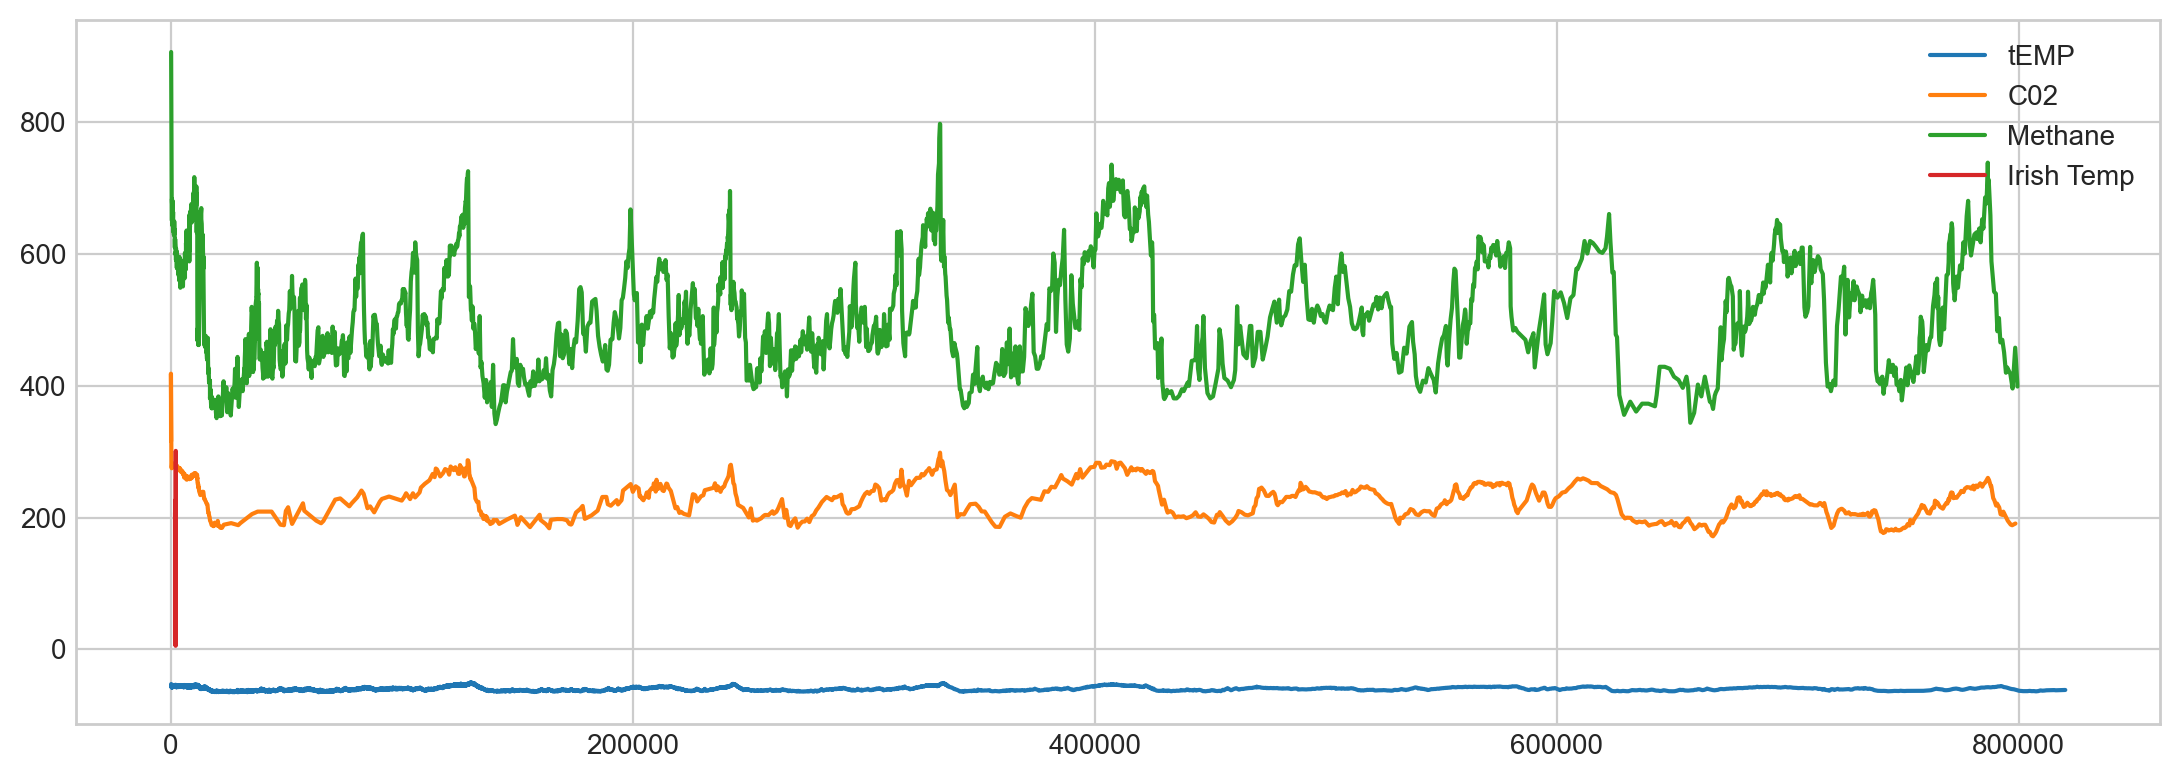

In [842]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'tEMP')
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'], label = 'C02')
plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane')
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Temp')
plt.legend()
plt.show()

In [843]:
#https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
merged2.to_csv('combined_temp.csv', encoding='utf-8', index=False)

In [844]:
#json_str = merged1.to_csv()

https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format

In [845]:
#https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format
co2_nature_mauna_loa.to_json('combined_temps.json',orient='records')

In [846]:
from scipy.interpolate import interp1d
x = np.array(co2_nature["EDC3_gas_a (yr)"])
y = np.array(co2_nature["CO2 (ppmv)"])

In [847]:
x

array([   137,    268,    279, ..., 796467, 797099, 798512], dtype=int64)

In [848]:
y

array([280.4, 274.9, 277.9, ..., 189.3, 188.4, 191. ])

In [849]:
f = interp1d(x, y, kind="linear")

In [850]:
int_age = np.linspace(x[0], x[-1], 5785)

# Interpolate the values of y using the new array and the interpolation function
int_co2 = f(int_age)

In [851]:
int_age

array([1.37000000e+02, 2.75031639e+02, 4.13063278e+02, ...,
       7.98235937e+05, 7.98373968e+05, 7.98512000e+05])

In [852]:
int_co2

array([280.4       , 276.81771973, 281.43005225, ..., 190.49202794,
       190.74601397, 191.        ])

In [853]:
dfa = pd.DataFrame({'year': int_age, 'CO2': int_co2})


In [854]:
dfa.to_csv('interpolated.csv', encoding='utf-8')

In [855]:
dfi=pd.read_csv('interpolated.csv')
dfi

Unnamed: 0           year         CO2
0              0     137.000000  280.400000
1              1     275.031639  276.817720
2              2     413.063278  281.430052
3              3     551.094917  280.736793
4              4     689.126556  281.761393
...          ...            ...         ...
5780        5780  797959.873444  189.984056
5781        5781  798097.905083  190.238042
5782        5782  798235.936722  190.492028
5783        5783  798373.968361  190.746014
5784        5784  798512.000000  191.000000

[5785 rows x 3 columns]

In [856]:
#co2_nature_mauna_loai = pd.concat(int_age,int_co2)

In [857]:
dfa.shape

(5785, 2)

In [858]:
dfa.shape

(5785, 2)

In [859]:
dfa.describe()

year          CO2
count    5785.000000  5785.000000
mean   399324.500000   223.812813
std    230530.779174    25.423352
min       137.000000   171.693951
25%    199730.750000   202.972689
50%    399324.500000   222.284586
75%    598918.250000   241.652120
max    798512.000000   298.053853

MACHINELEARNINGMASTERY.COM
FREQUENCY ANALYSIS ??

In [860]:
#r = np.corrcoef(temp_jouzel.loc[:1095,'celsius'],df17.loc[:1095,'CH4 mean'])
#print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is ", r)
#r

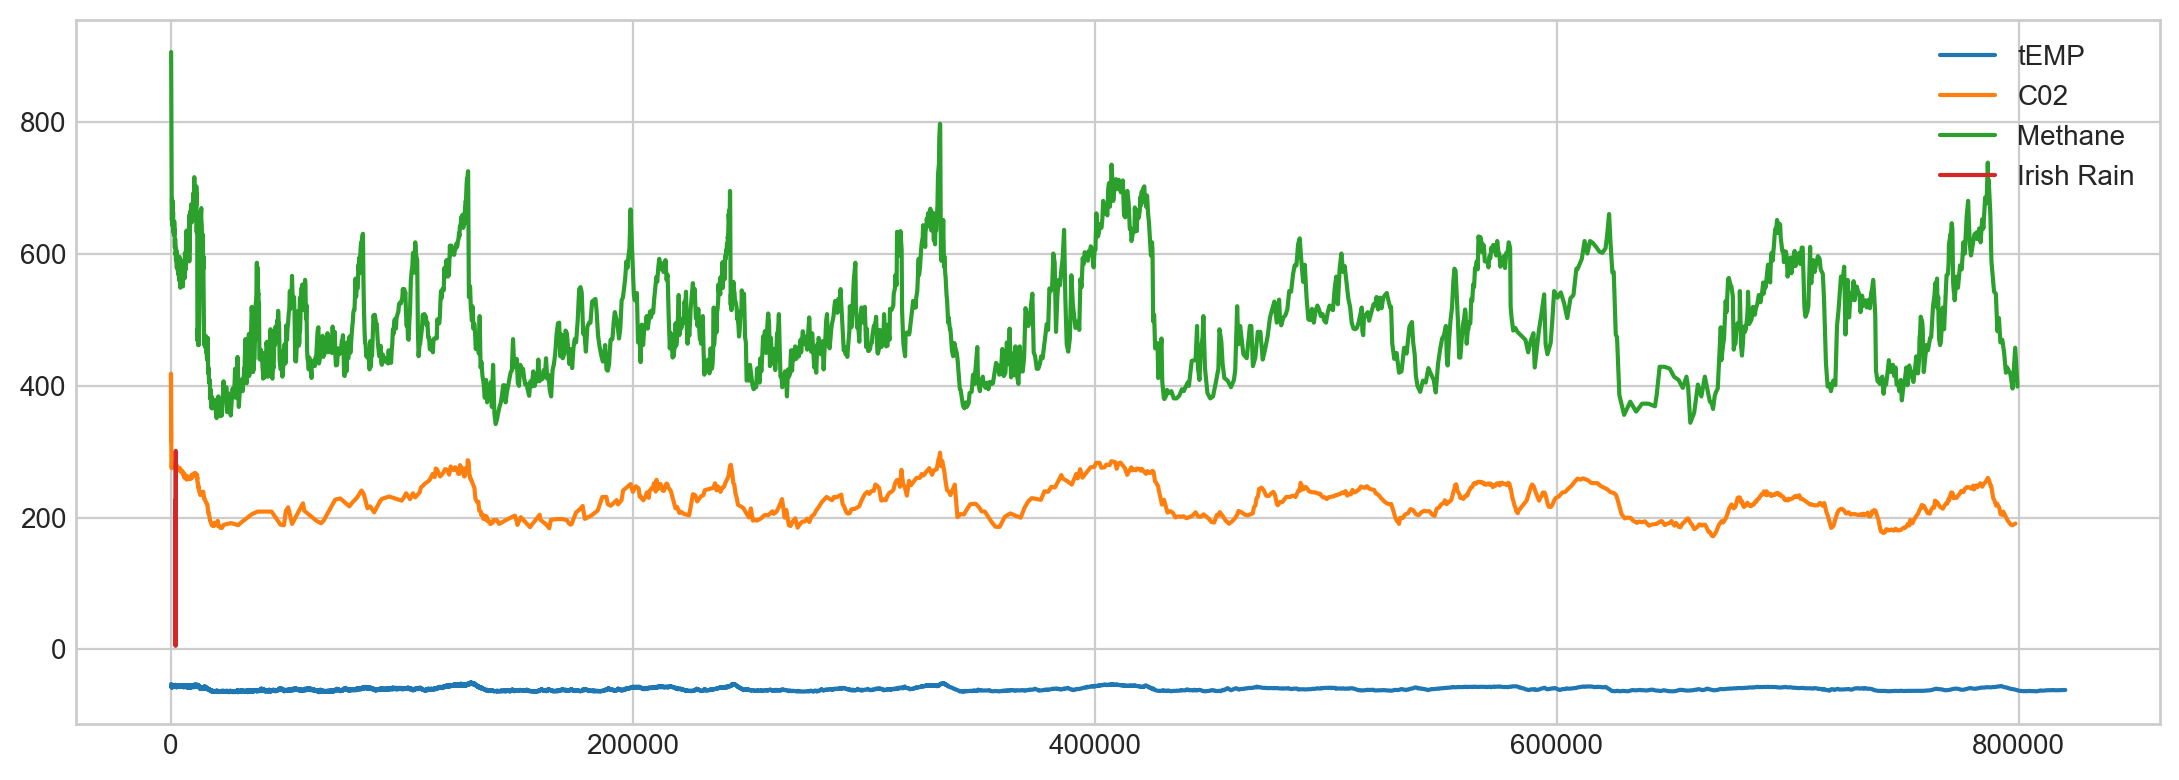

In [861]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'tEMP')
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'], label = 'C02')
plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane')
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Rain')
plt.legend()
plt.show()

# Fourier transform 

In [862]:
from scipy.fft import fft, fftfreq
import pandas as pd
import scipy.fft
# Read the dataset from a CSV file
#df = pd.read_excel('C02 Nature Paper.xlsx',sheet_name='3.  Composite CO2' ,skiprows=range(6))

# Select the column with CO2 (ppmv) values
y = co2_nature['CO2 (ppmv)']
y = np.ascontiguousarray(y)


In [863]:
yf = fft(y) # Frequency spectrum
xf = fftfreq(y.size)

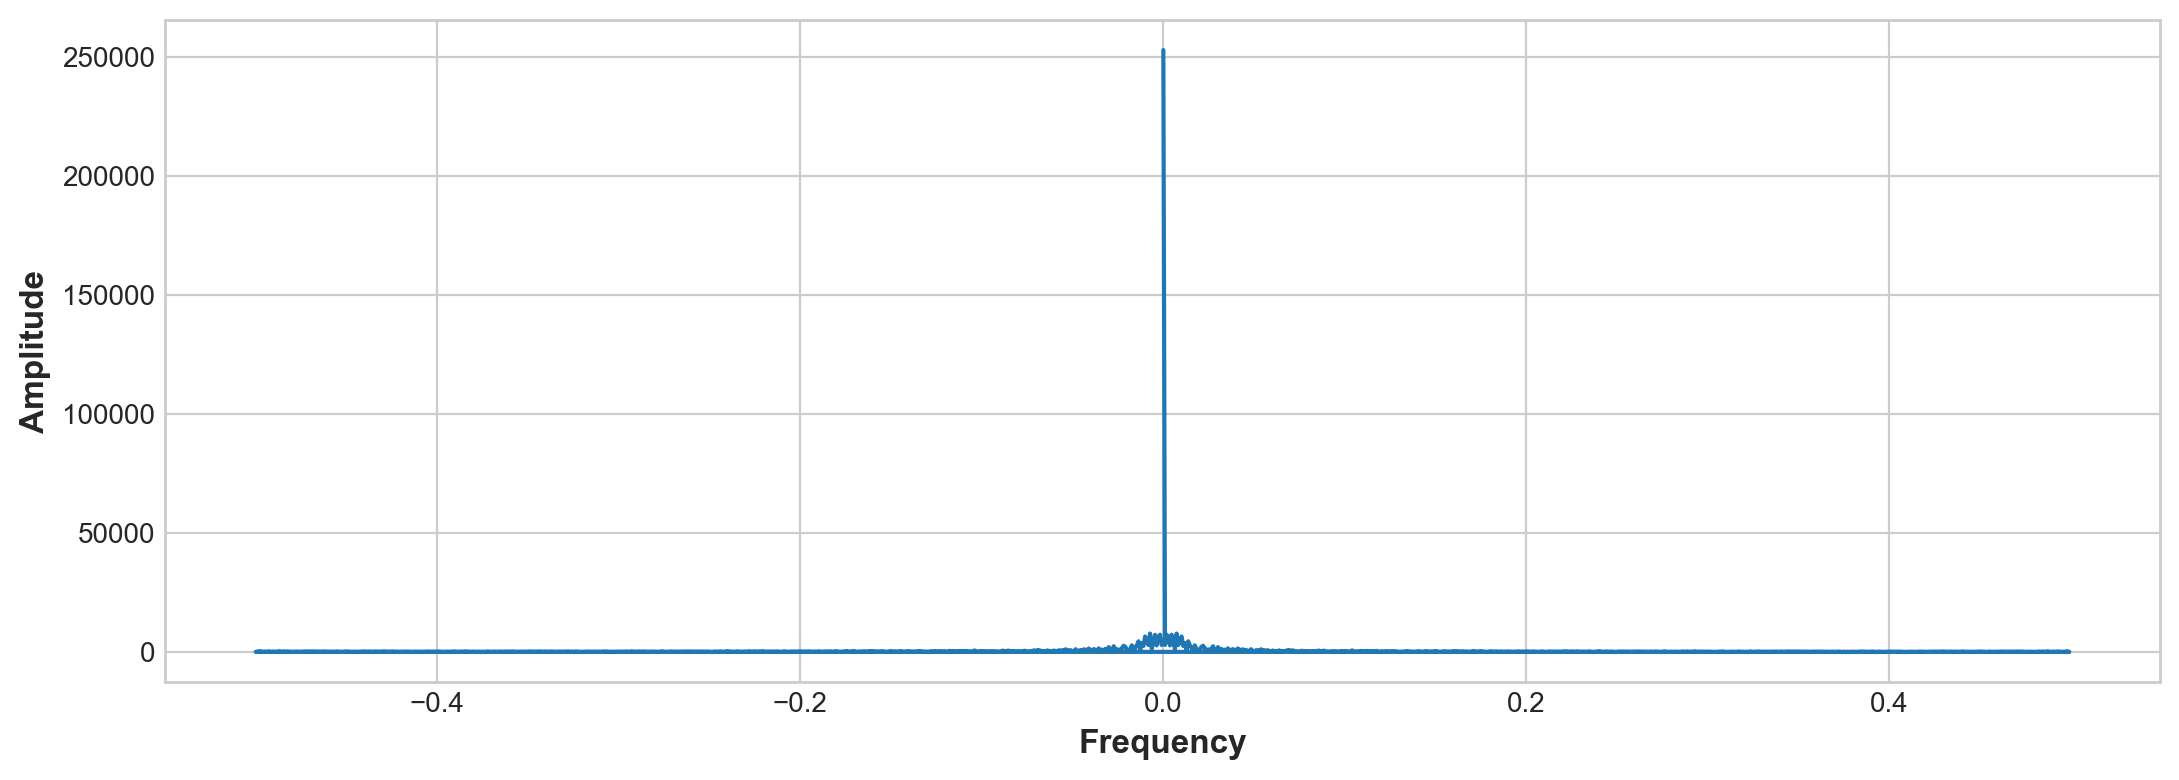

In [864]:
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [865]:
co2_nature

EDC3_gas_a (yr)  CO2 (ppmv)
0                 137       280.4
1                 268       274.9
2                 279       277.9
3                 395       279.1
4                 404       281.9
...               ...         ...
1091           794608       199.4
1092           795202       195.2
1093           796467       189.3
1094           797099       188.4
1095           798512       191.0

[1096 rows x 2 columns]

In [866]:
co2_ipcc

Gasage (yr BP)  CO2 (ppmv)  sigma mean CO2 (ppmv)
0         -51.030000  368.022488               0.060442
1         -48.000000  361.780737               0.370000
2         -46.279272  359.647793               0.098000
3         -44.405642  357.106740               0.159923
4         -43.080000  353.946685               0.043007
...              ...         ...                    ...
1896   803925.284376  202.921723               2.064488
1897   804009.870607  207.498645               0.915083
1898   804522.674630  204.861938               1.642851
1899   805132.442334  202.226839               0.689587
1900   805668.868405  207.285440               2.202808

[1901 rows x 3 columns]

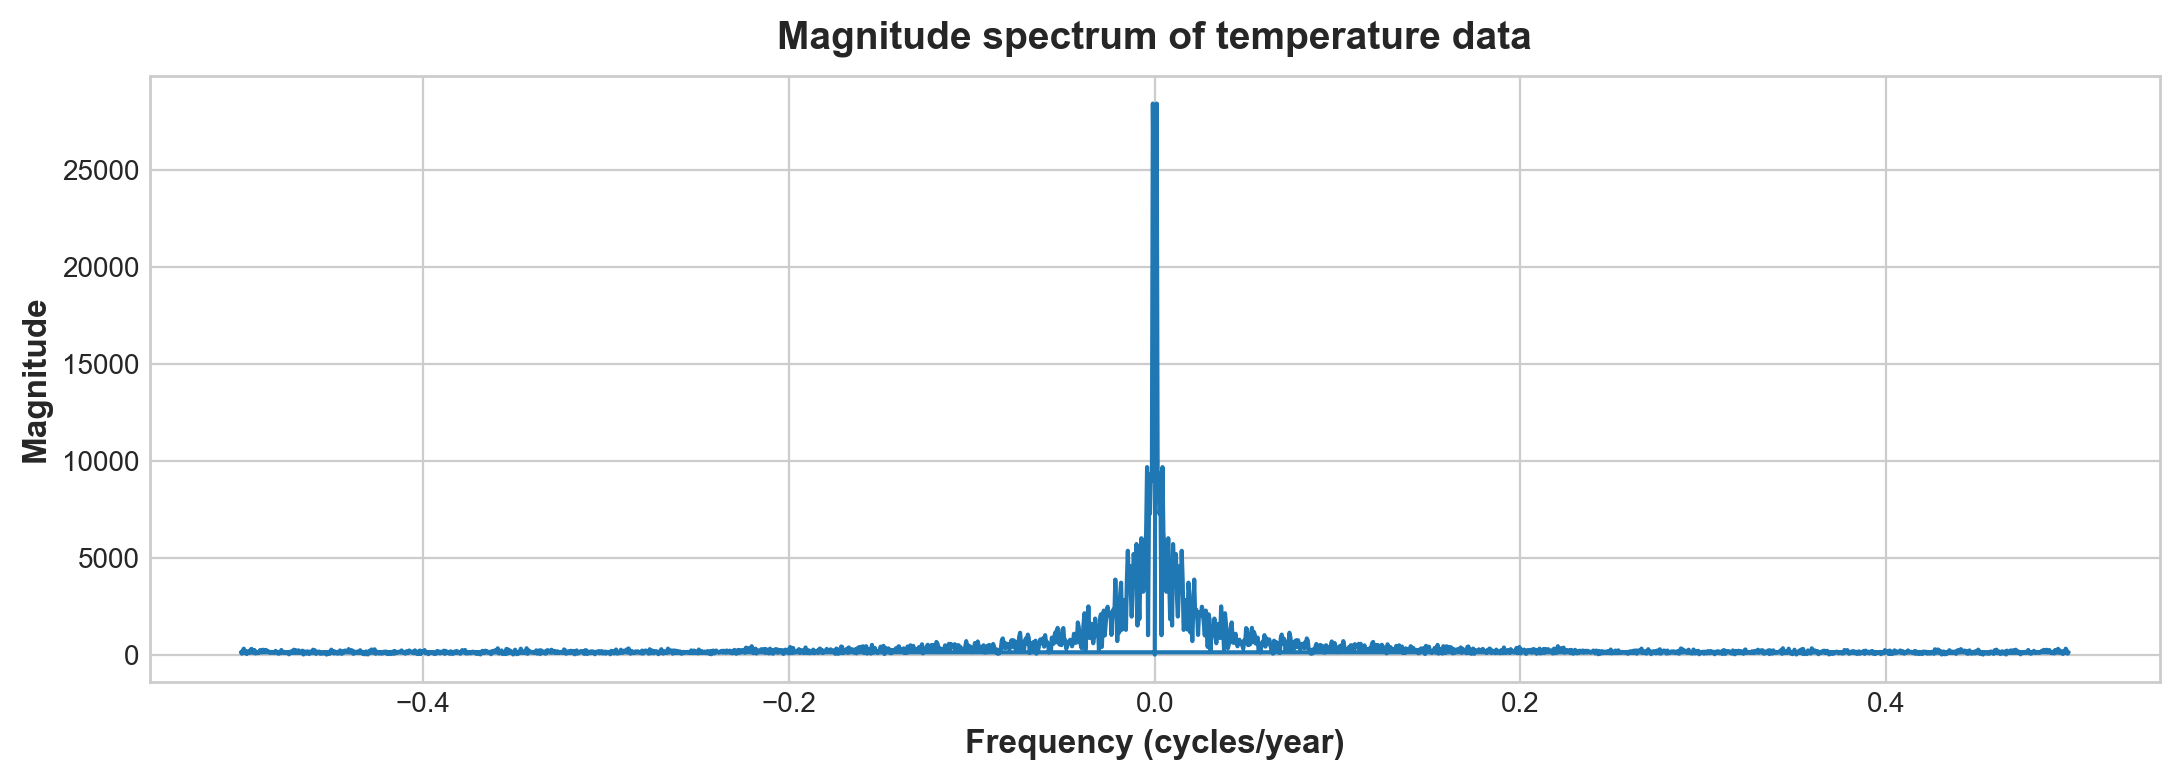

In [867]:
#df = pd.read_csv("global_temperature.csv")

# Extract the temperature column as a numpy array
temp = co2_ipcc["CO2 (ppmv)"].to_numpy()

# Subtract the mean to concentrate on temperature fluctuations
temp = temp - np.mean(temp)

# Perform the Fourier transform
Temp = np.fft.fft(temp) # complex spectrum
Temp_mag = np.abs(Temp) # magnitude spectrum
Temp_phase = np.angle(Temp) # phase spectrum
f = np.fft.fftfreq(len(temp), 1) # frequency vector in cycles per year

# Plot the magnitude spectrum in frequency domain
plt.figure()
plt.plot(f, Temp_mag)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of temperature data")
#plt.xlim(0, -.5) # zoom in to see the peaks
plt.show()

In [868]:
#df = pd.read_csv("global_temperature.csv")

# Extract the temperature column as a numpy array
temp = co2_nature["CO2 (ppmv)"].to_numpy()

# Subtract the mean to concentrate on temperature fluctuations
temp = temp - np.mean(temp)

# Perform the Fourier transform
Temp = np.fft.fft(temp) # complex spectrum
Temp_mag = np.abs(Temp) # magnitude spectrum
Temp_phase = np.angle(Temp) # phase spectrum
f = np.fft.fftfreq(len(temp), 1) # frequency vector in cycles per year

# Plot the magnitude spectrum in frequency domain
plt.figure()
plt.plot(f, Temp_mag)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of temperature data")
#plt.xlim(0, -.5) # zoom in to see the peaks
plt.show()

from sklearn.linear_model import LinearRegression
# Create a linear regression model to predict global temperature based on CO2 levels
X = co2_nature_mauna_loa['CO2 (ppmv)'].values.reshape(-1, 1)
y = temp_noaa2['Temperature'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Print the model coefficients
#print(f'Intercept: {model.intercept_[0]:.2f}')
#print(f'Slope: {model.coef_[0][0]:.2f}')

https://stackoverflow.com/questions/41492882/find-time-shift-of-two-signals-using-cross-correlation

In [869]:
ts1=co2_nature_mauna_loa['CO2 (ppmv)']
ts2=temp_noaa2['Temperature']
ts3=methane_noaa['CH4_mean']
ts4=yearly_averages
ts6=irish_temp['Annual']

In [870]:

from scipy import signal
corr = signal.correlate(ts1,ts2,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


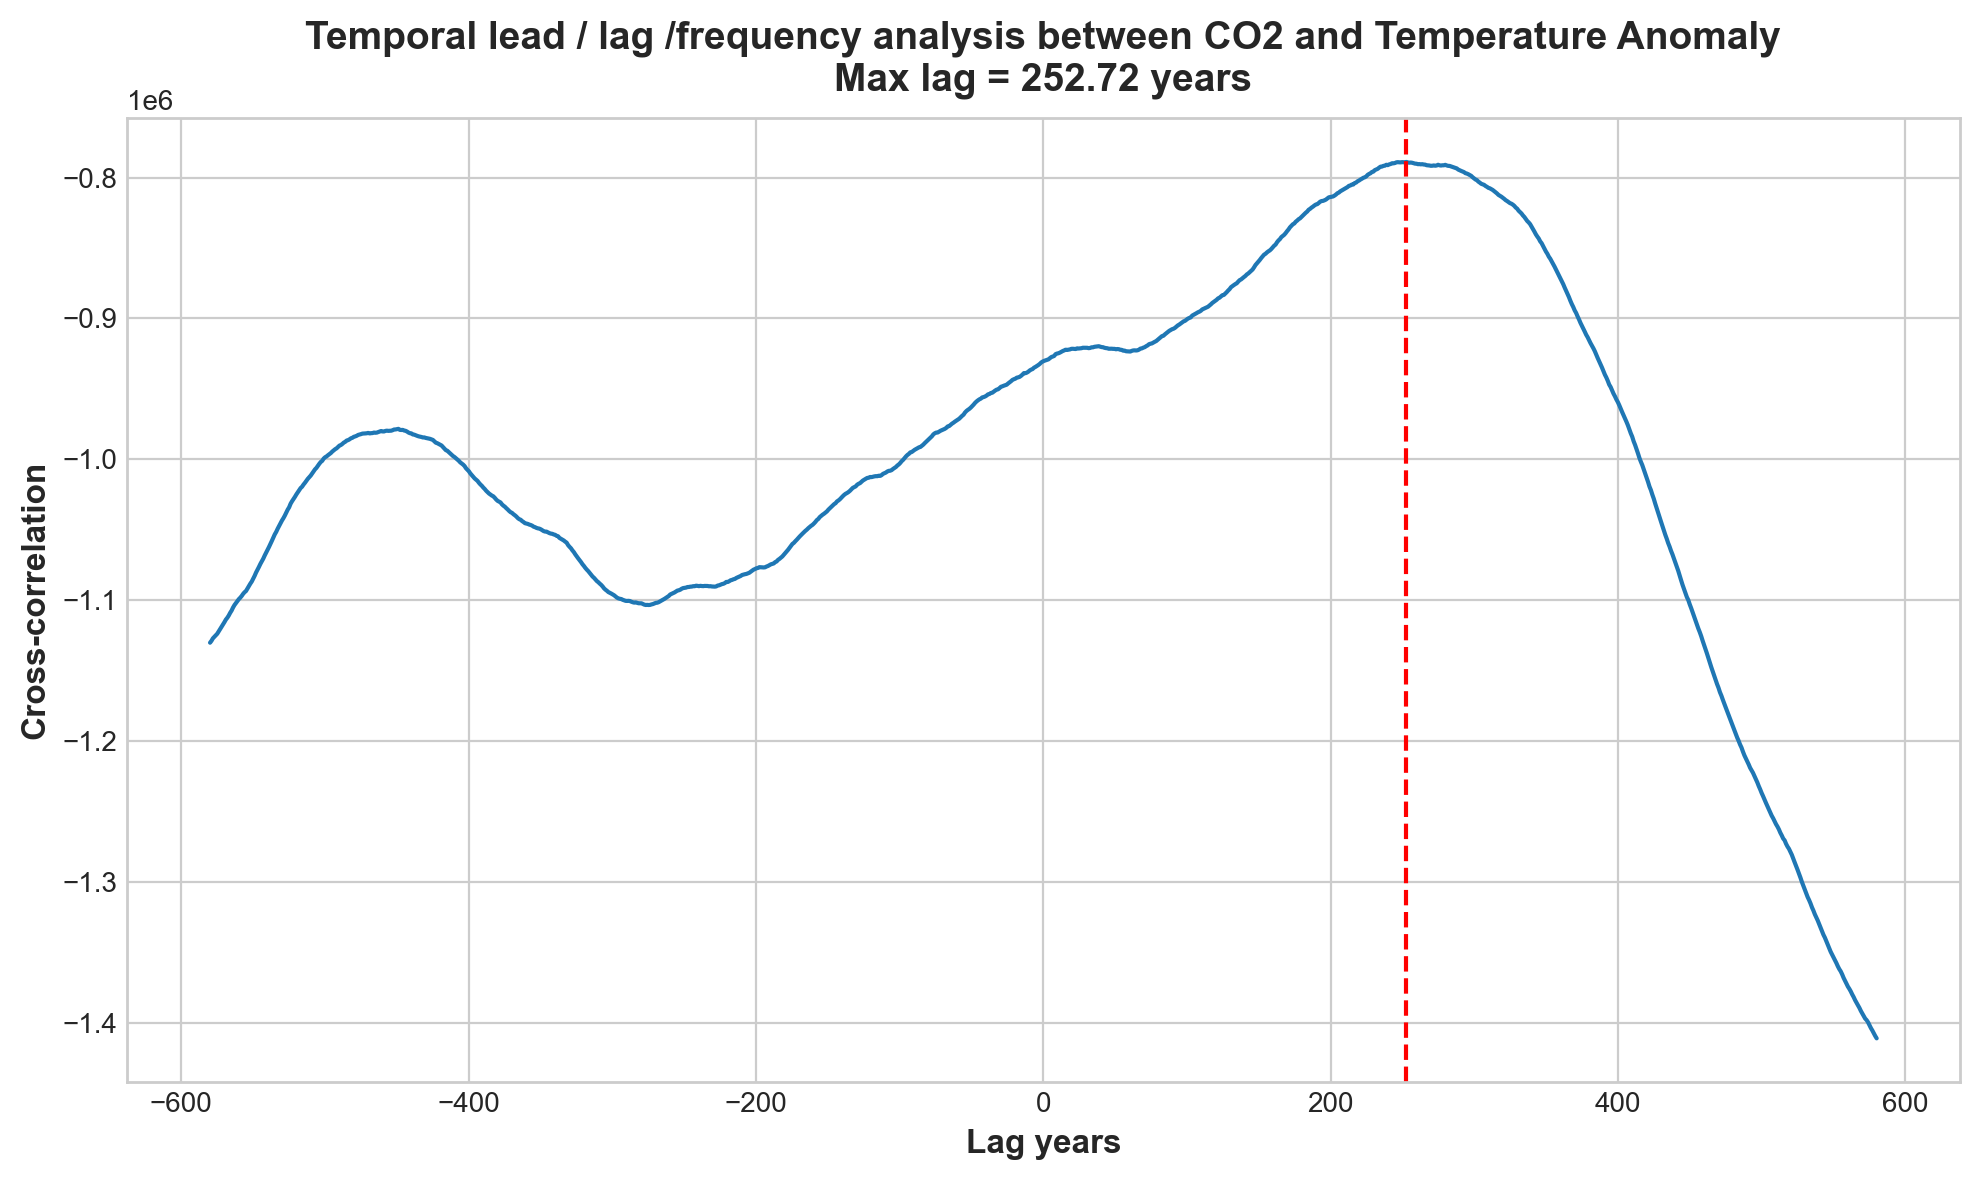

In [871]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and Temperature Anomaly\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [872]:
corr = signal.correlate(ts2,ts3,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


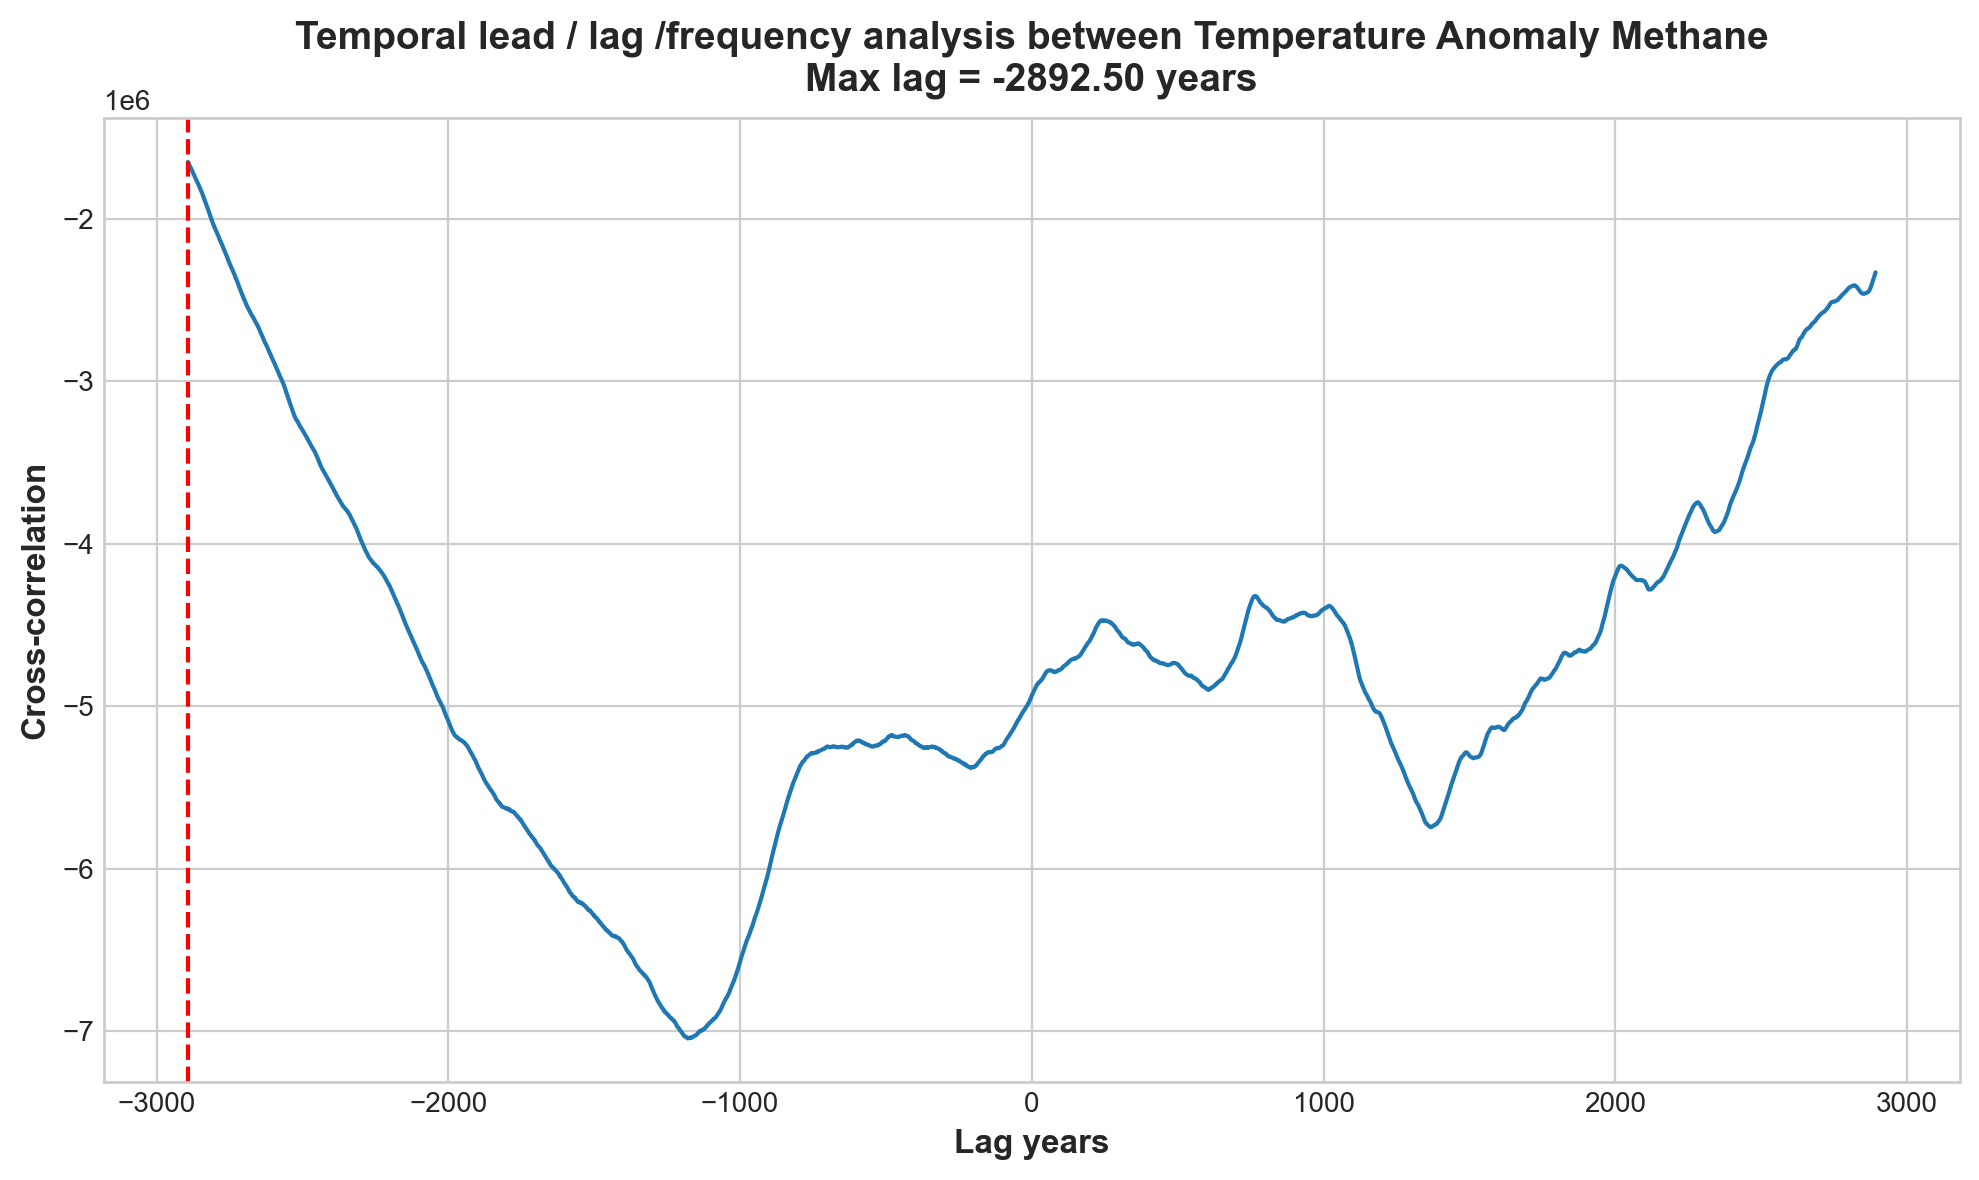

In [873]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between Temperature Anomaly Methane\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [874]:
corr = signal.correlate(ts1,ts4,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


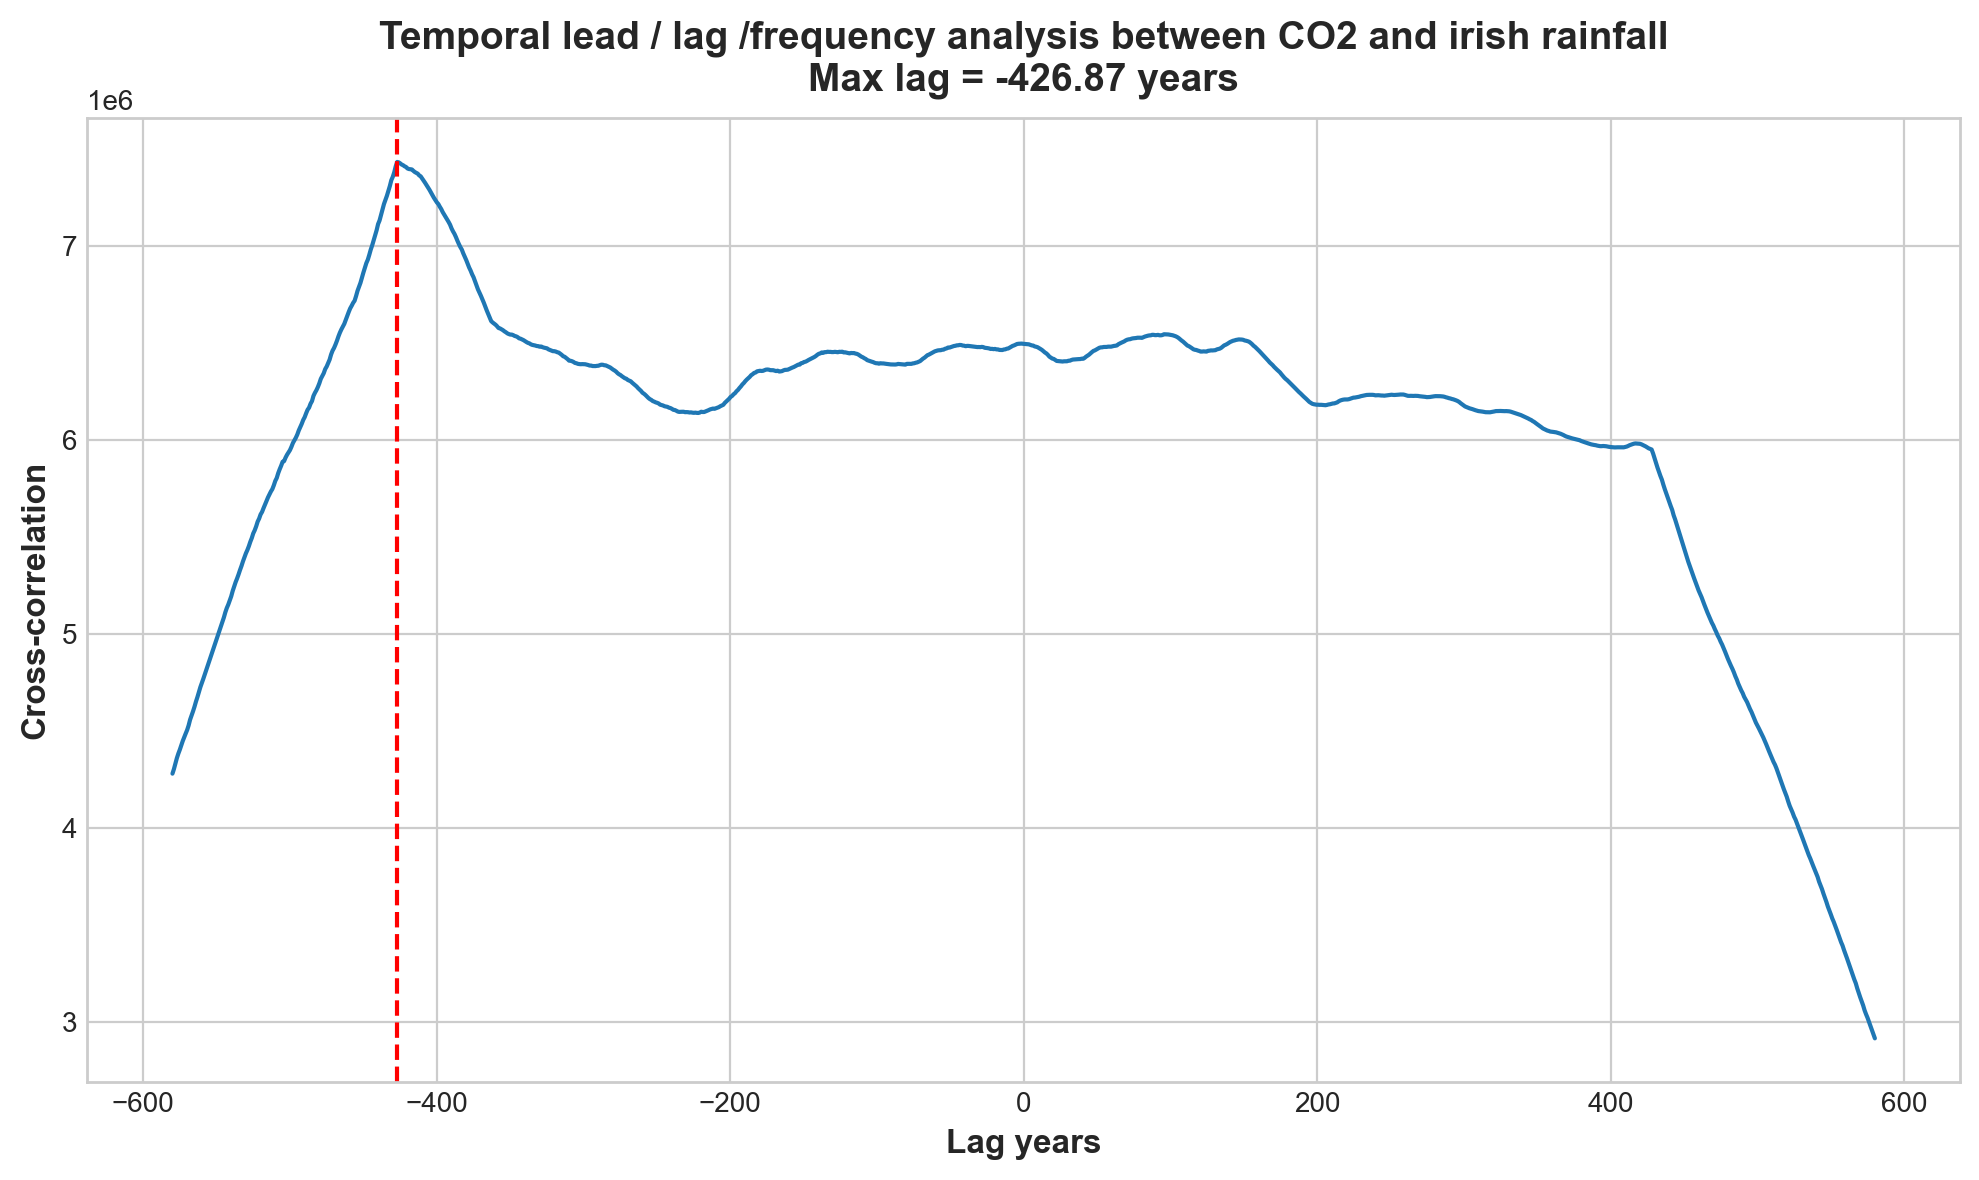

In [875]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and irish rainfall\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [876]:
corr = signal.correlate(ts1,ts6,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


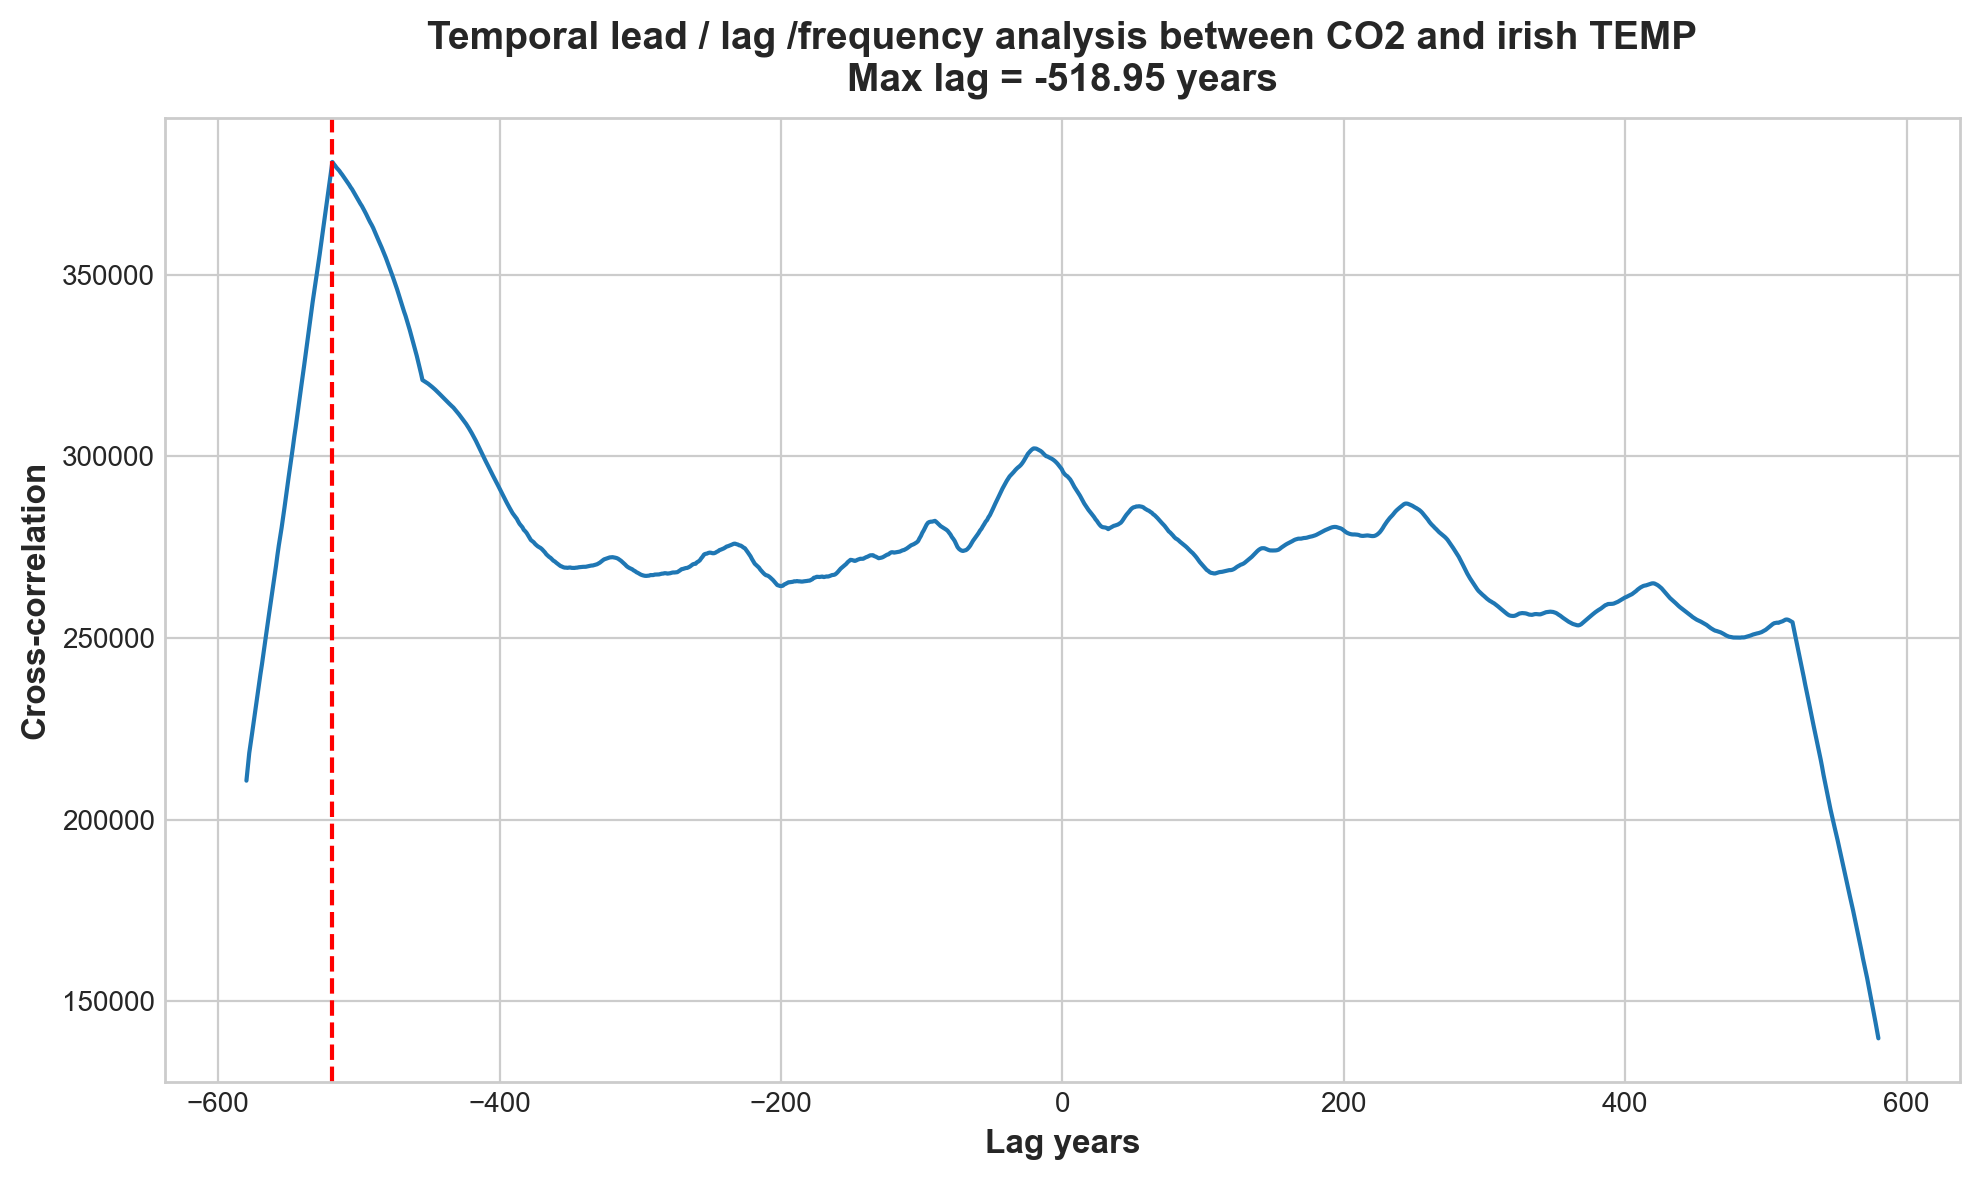

In [877]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and irish TEMP\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

# Frequency Analysis

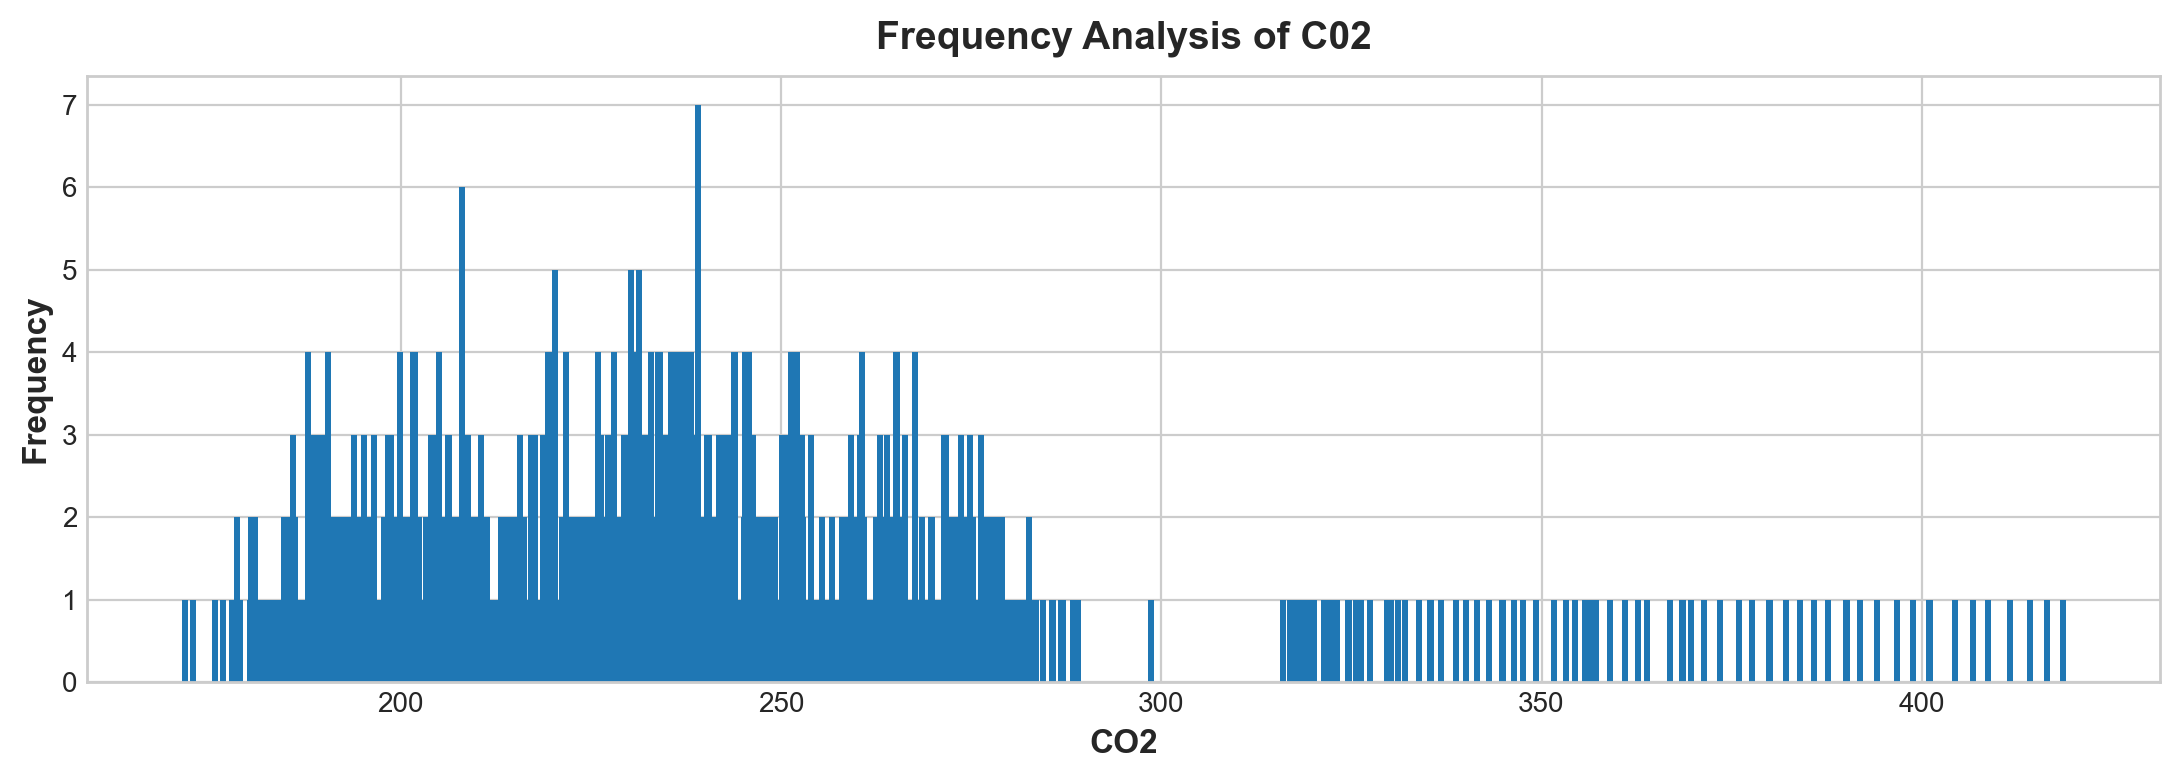

In [878]:
freq = ts1.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("CO2")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of C02")
plt.show()

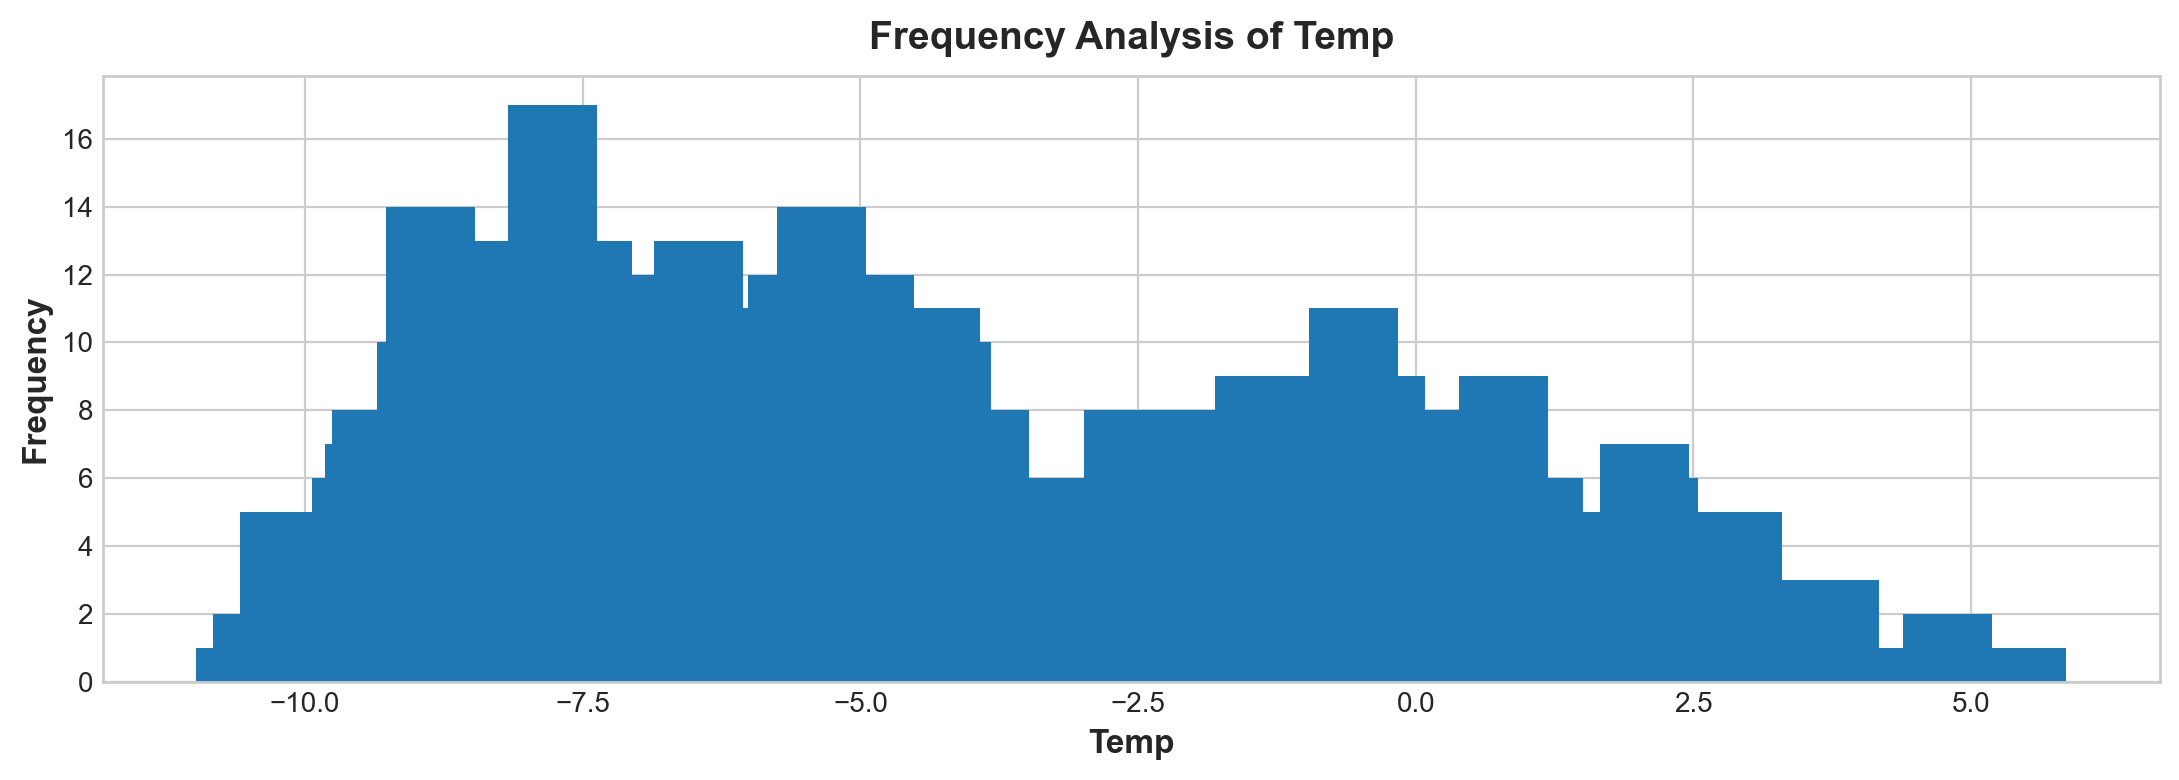

In [879]:
freq = ts2.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Temp")
plt.show()

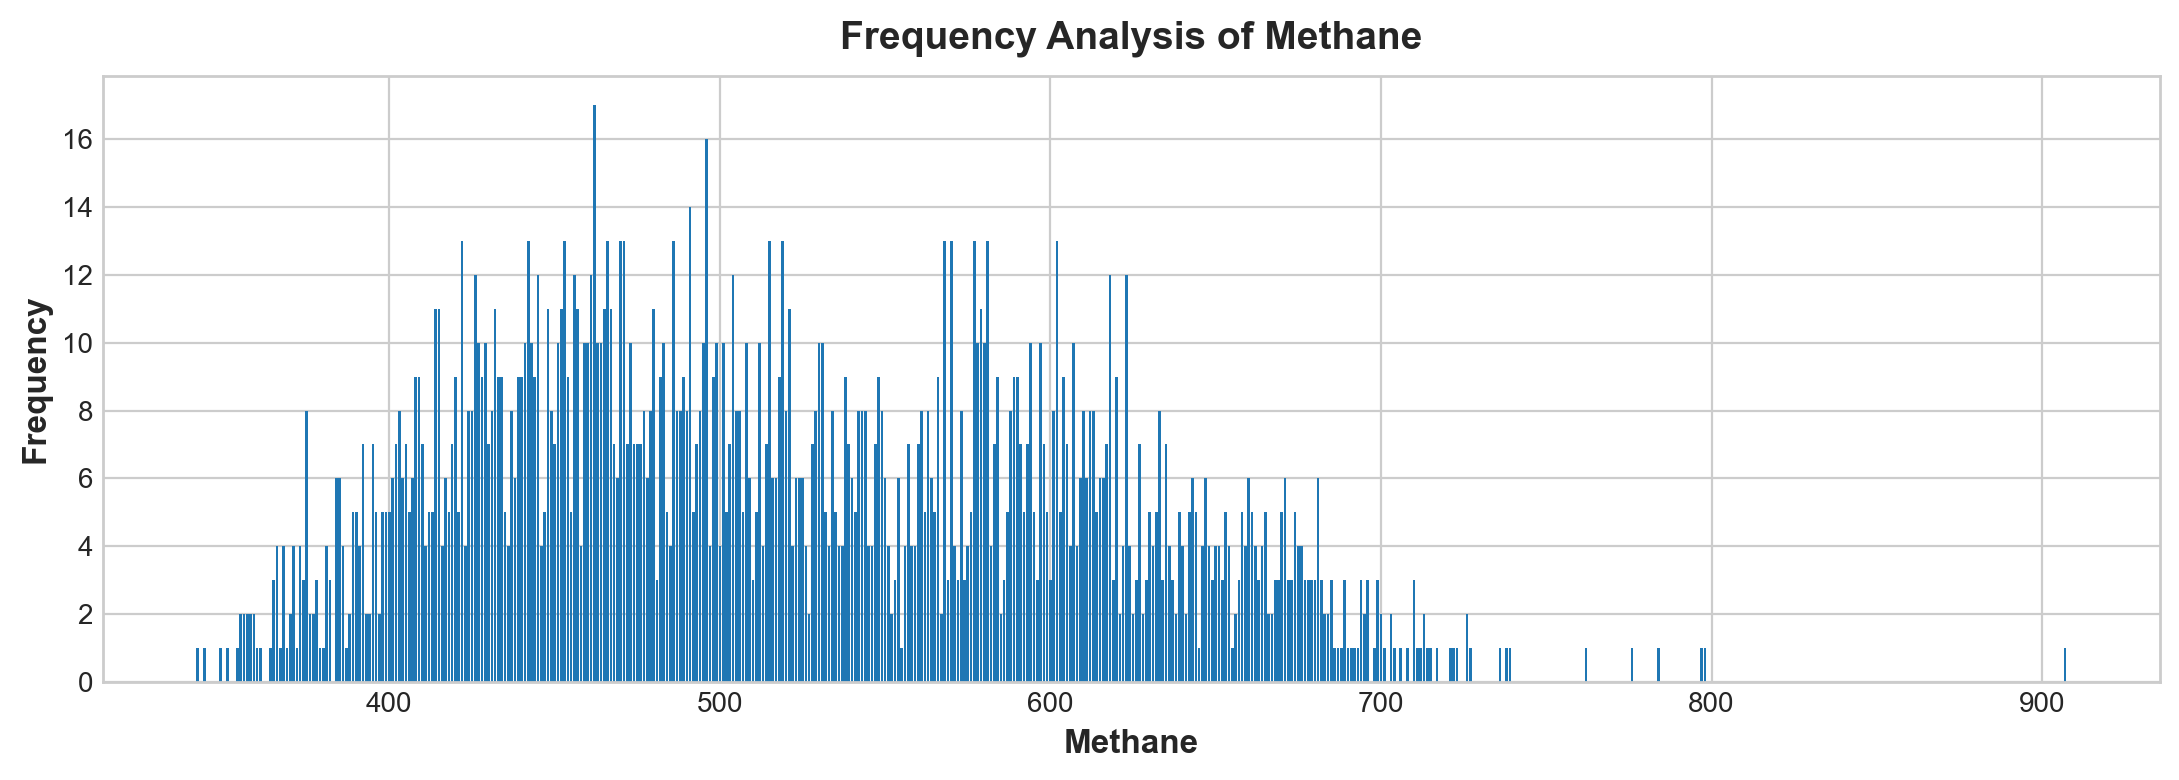

In [880]:
freq = ts3.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Methane")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Methane")
plt.show()

In [881]:
freq = ts4.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Irish Rain")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Irish Rain")
plt.show()

In [882]:
freq = ts6.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Irish Temp")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Irish Temp")
plt.show()

In [883]:
co2_mauna_loa.head()

EDC3_gas_a (yr)  CO2 (ppmv)   unc
0               -9      315.98  0.12
1              -10      316.91  0.12
2              -11      317.64  0.12
3              -12      318.45  0.12
4              -13      318.99  0.12

In [884]:
ts11=temp_noaa2

In [885]:
ts11

Bag     ztop           Age  Deuterium  Temperature
12      13     6.60      38.37379    -390.90         0.88
13      14     7.15      46.81203    -385.10         1.84
14      15     7.70      55.05624    -377.80         3.04
15      16     8.25      64.41511    -394.10         0.35
16      17     8.80      73.15077    -398.70        -0.42
...    ...      ...           ...        ...          ...
5795  5796  3187.25  797408.00000    -440.20        -8.73
5796  5797  3187.80  798443.00000    -439.00        -8.54
5797  5798  3188.35  799501.00000    -441.10        -8.88
5798  5799  3188.90  800589.00000    -441.42        -8.92
5799  5800  3189.45  801662.00000    -440.90        -8.82

[5785 rows x 5 columns]

In [886]:
from warnings import simplefilter
simplefilter("ignore")  # ignore warnings to clean up output cells



# Load Tunnel Traffic dataset
#data_dir = Path("../input/ts-course-data")


# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
#tunnel = tunnel.set_index("Day")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.


In [887]:
#ts_co2_mauna_loa=co2_mauna_loa = ts_co2_mauna_loa=co2_mauna_loa.to_period()
#https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial
ts11

Bag     ztop           Age  Deuterium  Temperature
12      13     6.60      38.37379    -390.90         0.88
13      14     7.15      46.81203    -385.10         1.84
14      15     7.70      55.05624    -377.80         3.04
15      16     8.25      64.41511    -394.10         0.35
16      17     8.80      73.15077    -398.70        -0.42
...    ...      ...           ...        ...          ...
5795  5796  3187.25  797408.00000    -440.20        -8.73
5796  5797  3187.80  798443.00000    -439.00        -8.54
5797  5798  3188.35  799501.00000    -441.10        -8.88
5798  5799  3188.90  800589.00000    -441.42        -8.92
5799  5800  3189.45  801662.00000    -440.90        -8.82

[5785 rows x 5 columns]

In [ ]:
df = ts11.copy()

df['tme'] = np.arange(len(ts11.index))

df.tail()

Bag     ztop       Age  Deuterium  Temperature   tme
5795  5796  3187.25  797408.0    -440.20        -8.73  5780
5796  5797  3187.80  798443.0    -439.00        -8.54  5781
5797  5798  3188.35  799501.0    -441.10        -8.88  5782
5798  5799  3188.90  800589.0    -441.42        -8.92  5783
5799  5800  3189.45  801662.0    -440.90        -8.82  5784

In [914]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['tme']]  # features
y = df.loc[:, 'Temperature']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
y_pred

12     -4.438420
13     -4.438469
14     -4.438518
15     -4.438567
16     -4.438616
          ...   
5795   -4.721840
5796   -4.721889
5797   -4.721938
5798   -4.721987
5799   -4.722036
Length: 5785, dtype: float64

In [915]:
x

array([   137,    268,    279, ..., 796467, 797099, 798512], dtype=int64)

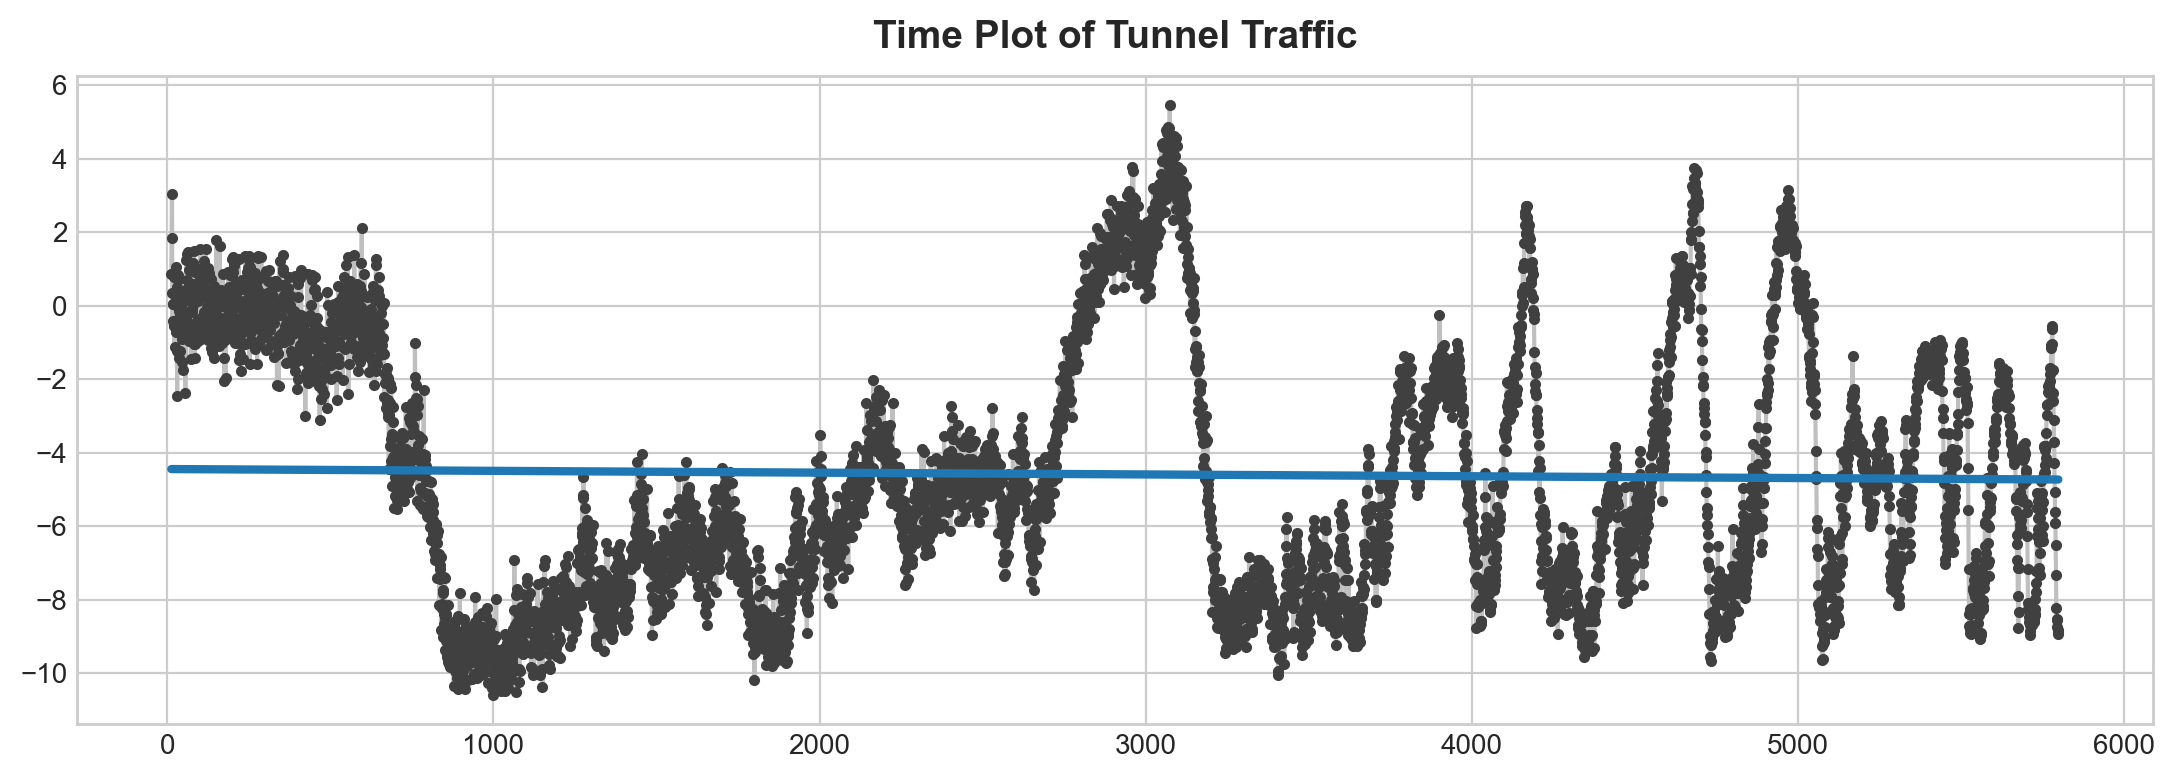

In [916]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

In [917]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load global temperature anomaly data from Our World in Data
# Source: [6](https://ourworldindata.org/grapher/temperature-anomaly)
data = pd.read_csv('temperature-anomaly.csv')
data = data.rename(columns={'Global average temperature anomaly relative to 1961-1990': 'temp_anomaly'}) # Rename column for clarity
data['Year'] = pd.to_datetime(data['Year']) # Convert year column to datetime format
data.describe()


temp_anomaly  \
count    522.000000   
mean      -0.072792   
std        0.387320   
min       -0.701569   
25%       -0.354566   
50%       -0.193912   
75%        0.110119   
max        1.275727   

       Upper bound of the annual temperature anomaly (95% confidence interval)  \
count                                         522.000000                         
mean                                            0.038905                         
std                                             0.347909                         
min                                            -0.486698                         
25%                                            -0.199500                         
50%                                            -0.056851                         
75%                                             0.208315                         
max                                             1.333305                         

       Lower bound of the annual temperature anomaly (95% confidence interval)  
count                                         522.000000                        
mean                                           -0.184489                        
std                                             0.432559                        
min                                            -0.947684                        
25%                                            -0.521331                        
50%                                            -0.294819                        
75%                                             0.052181                        
max                                             1.236863

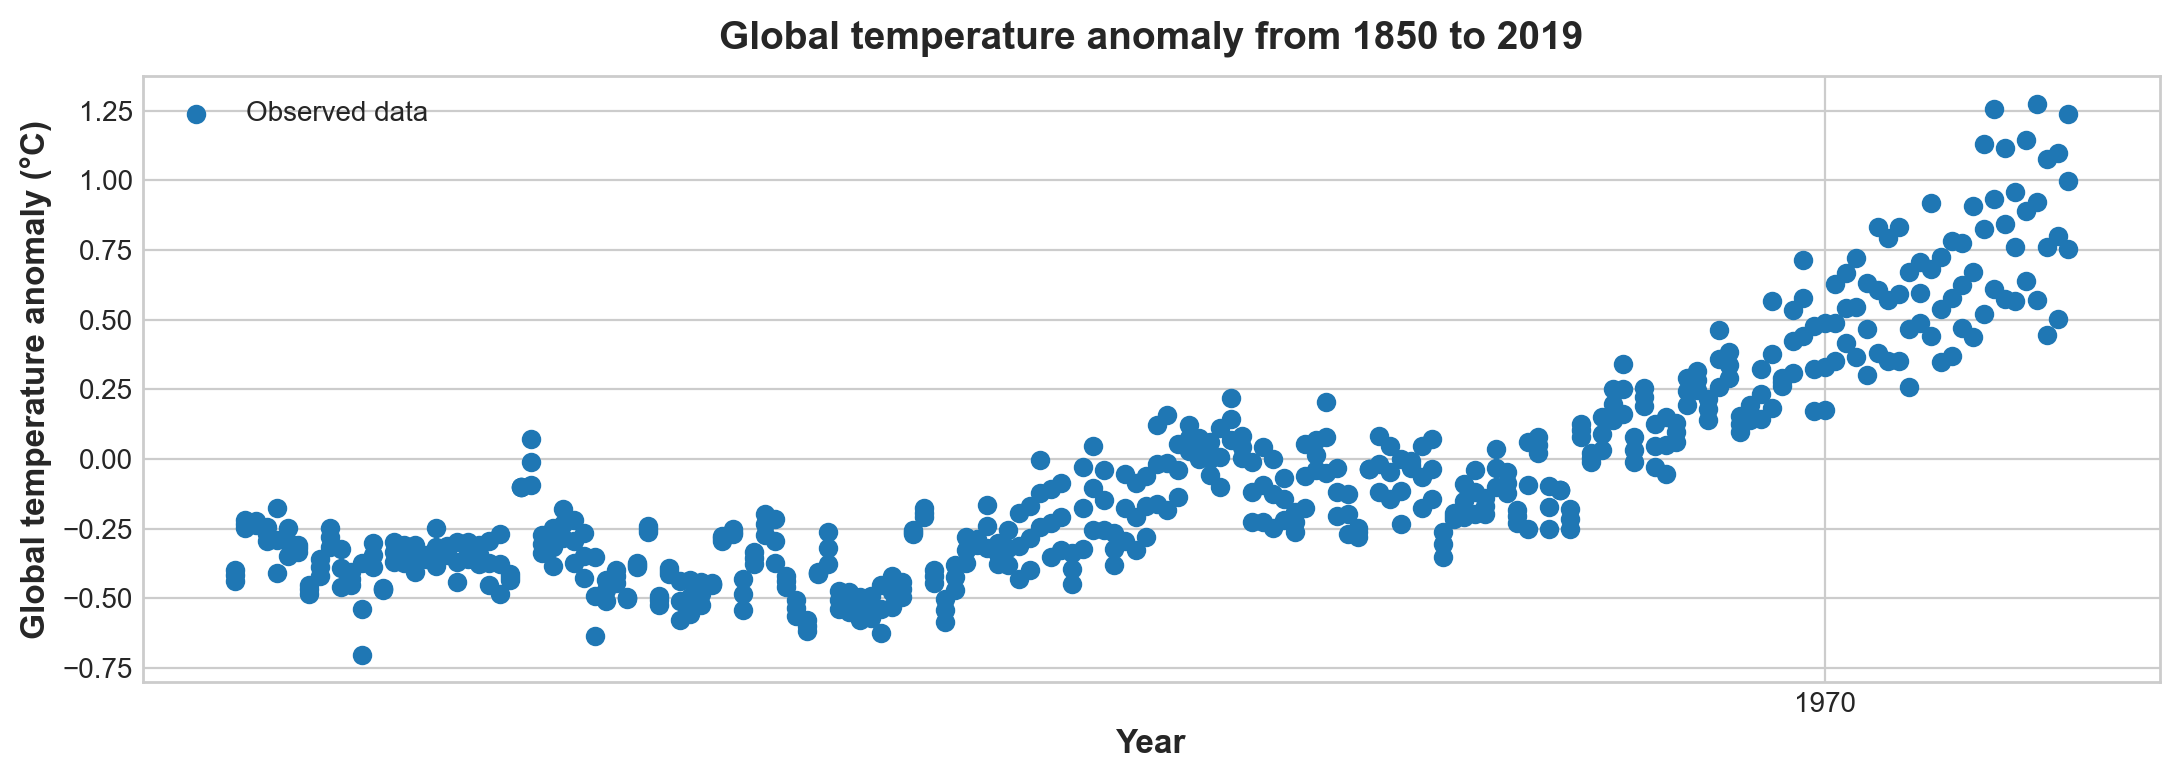

In [918]:
# Plot the data
plt.scatter(data['Year'], data['temp_anomaly'], label='Observed data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Global temperature anomaly from 1850 to 2019')
plt.legend()
plt.show()


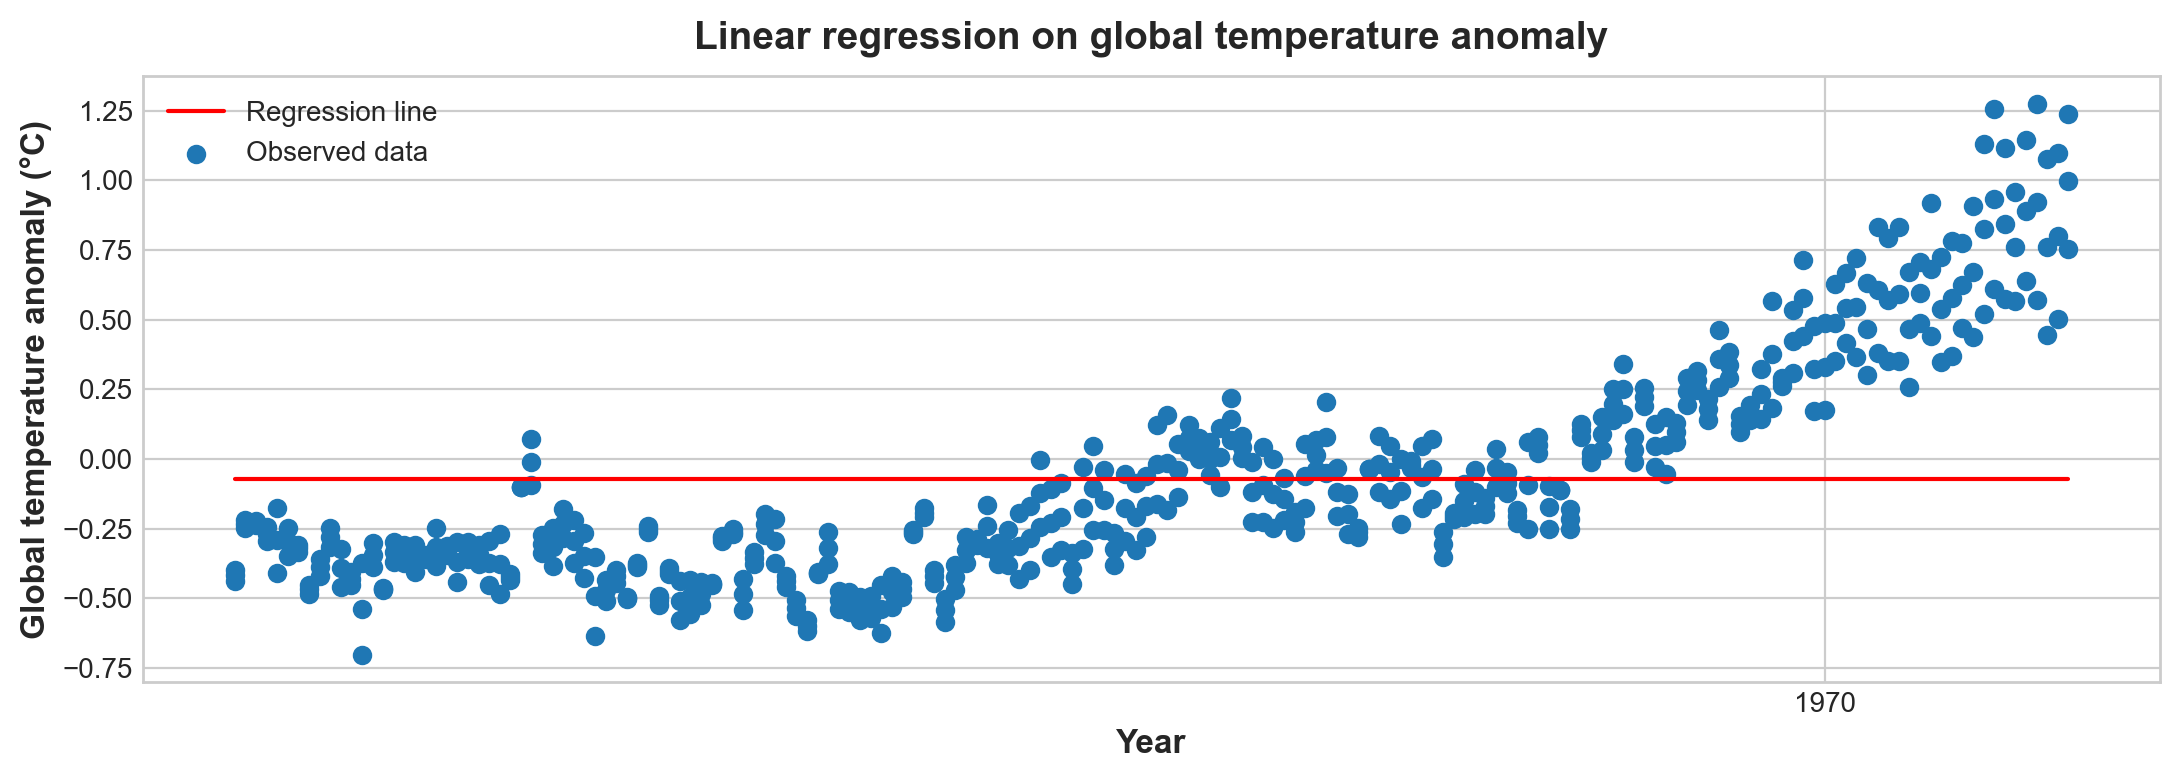

In [924]:
# Fit a linear regression model to the data
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = data['Year'].dt.year.values.reshape(-1, 1) # Reshape year column to 2D array
y = data['temp_anomaly'].values # Extract temp_anomaly column as 1D array
model.fit(X, y) # Train the model
y_pred = model.predict(X) # Make predictions
#print(f'Linear regression equation: y = {model.coef_[0]:.4f} * x + {model.intercept_:.4f}')
#print(f'R-squared score: {model.score(X, y):.4f}')

# Plot the regression line
plt.plot(data['Year'], y_pred, color='red', label='Regression line')
plt.scatter(data['Year'], data['temp_anomaly'], label='Observed data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Linear regression on global temperature anomaly')
plt.legend()
plt.show()




In [929]:
# Extrapolate the regression line to predict future temperature anomaly
future_years = pd.date_range(start='2020', end='2070', freq='Y') # Create a date range of future years
future_X = future_years.year.values.reshape(-1, 1) # Reshape to 2D array
future_y_pred = model.predict(future_X) # Make predictions

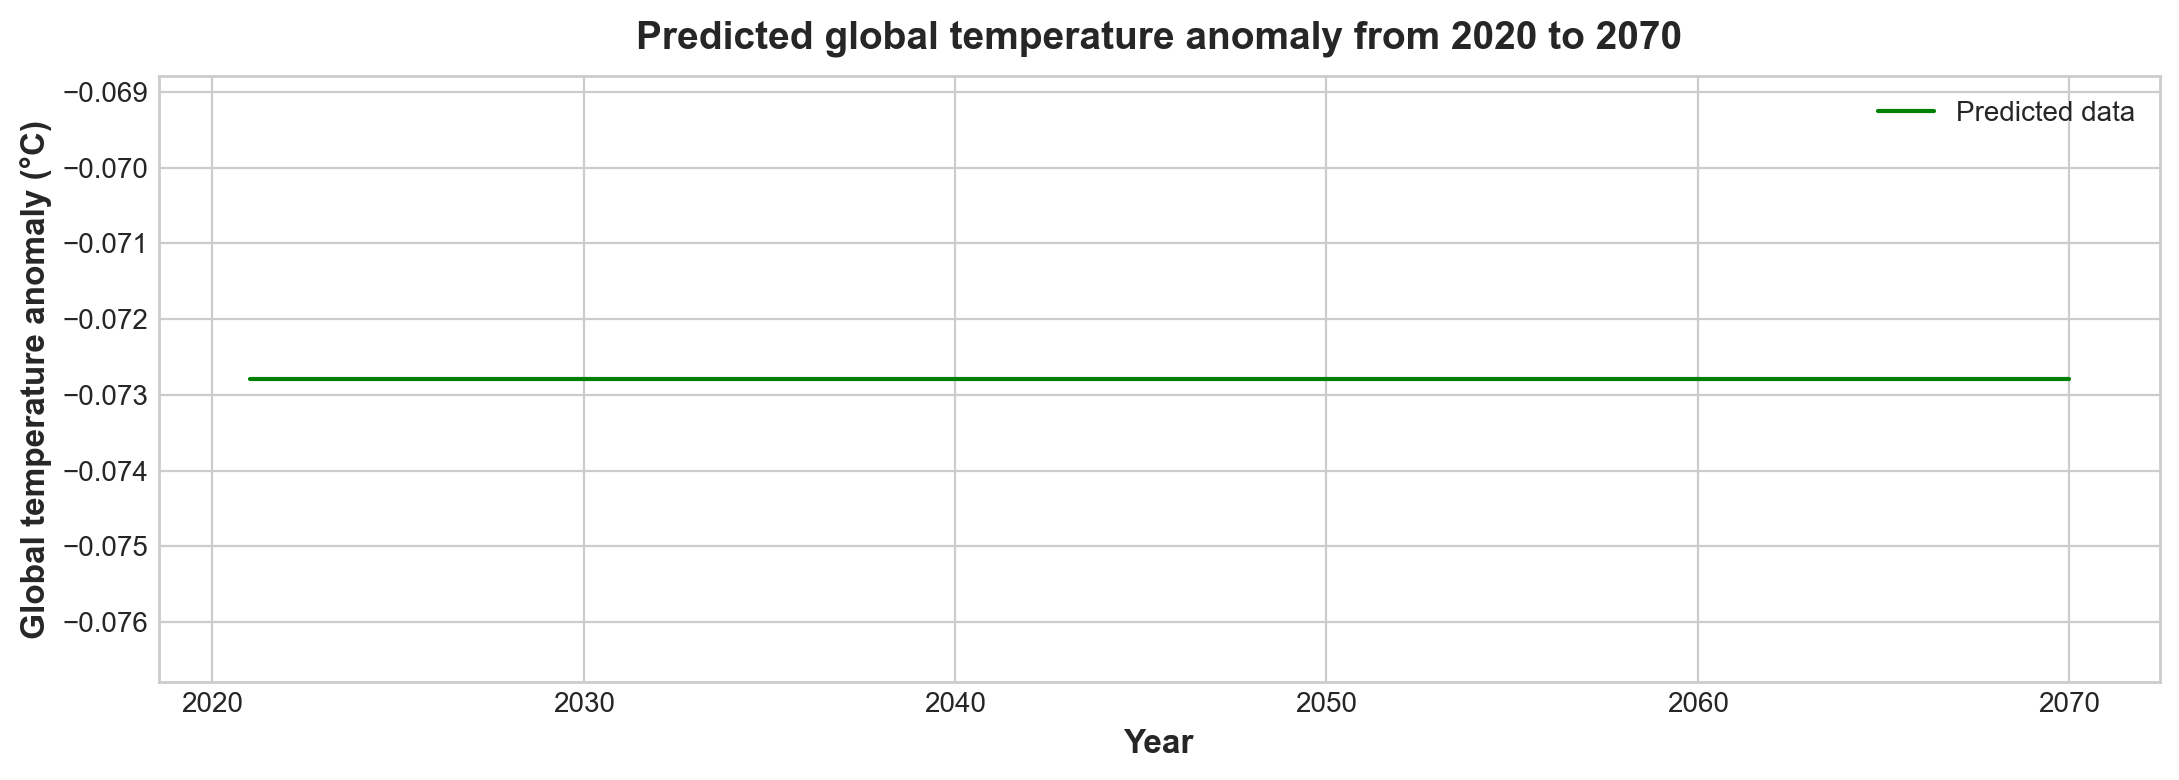

In [933]:
# Plot the predicted future temperature anomaly
plt.plot(future_years, future_y_pred, color='green', label='Predicted data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Predicted global temperature anomaly from 2020 to 2070')
plt.legend()
plt.show()

In [936]:
data1 = pd.read_csv('temperature-anomaly.csv')
data1 = data1.rename(columns={'Global average temperature anomaly relative to 1961-1990': 'temp_anomaly'}) # Rename column for clarity
data1['Year'] = pd.to_datetime(data1['Year']) # Convert year column to datetime format
data1.describe()

temp_anomaly  \
count    522.000000   
mean      -0.072792   
std        0.387320   
min       -0.701569   
25%       -0.354566   
50%       -0.193912   
75%        0.110119   
max        1.275727   

       Upper bound of the annual temperature anomaly (95% confidence interval)  \
count                                         522.000000                         
mean                                            0.038905                         
std                                             0.347909                         
min                                            -0.486698                         
25%                                            -0.199500                         
50%                                            -0.056851                         
75%                                             0.208315                         
max                                             1.333305                         

       Lower bound of the annual temperature anomaly (95% confidence interval)  
count                                         522.000000                        
mean                                           -0.184489                        
std                                             0.432559                        
min                                            -0.947684                        
25%                                            -0.521331                        
50%                                            -0.294819                        
75%                                             0.052181                        
max                                             1.236863

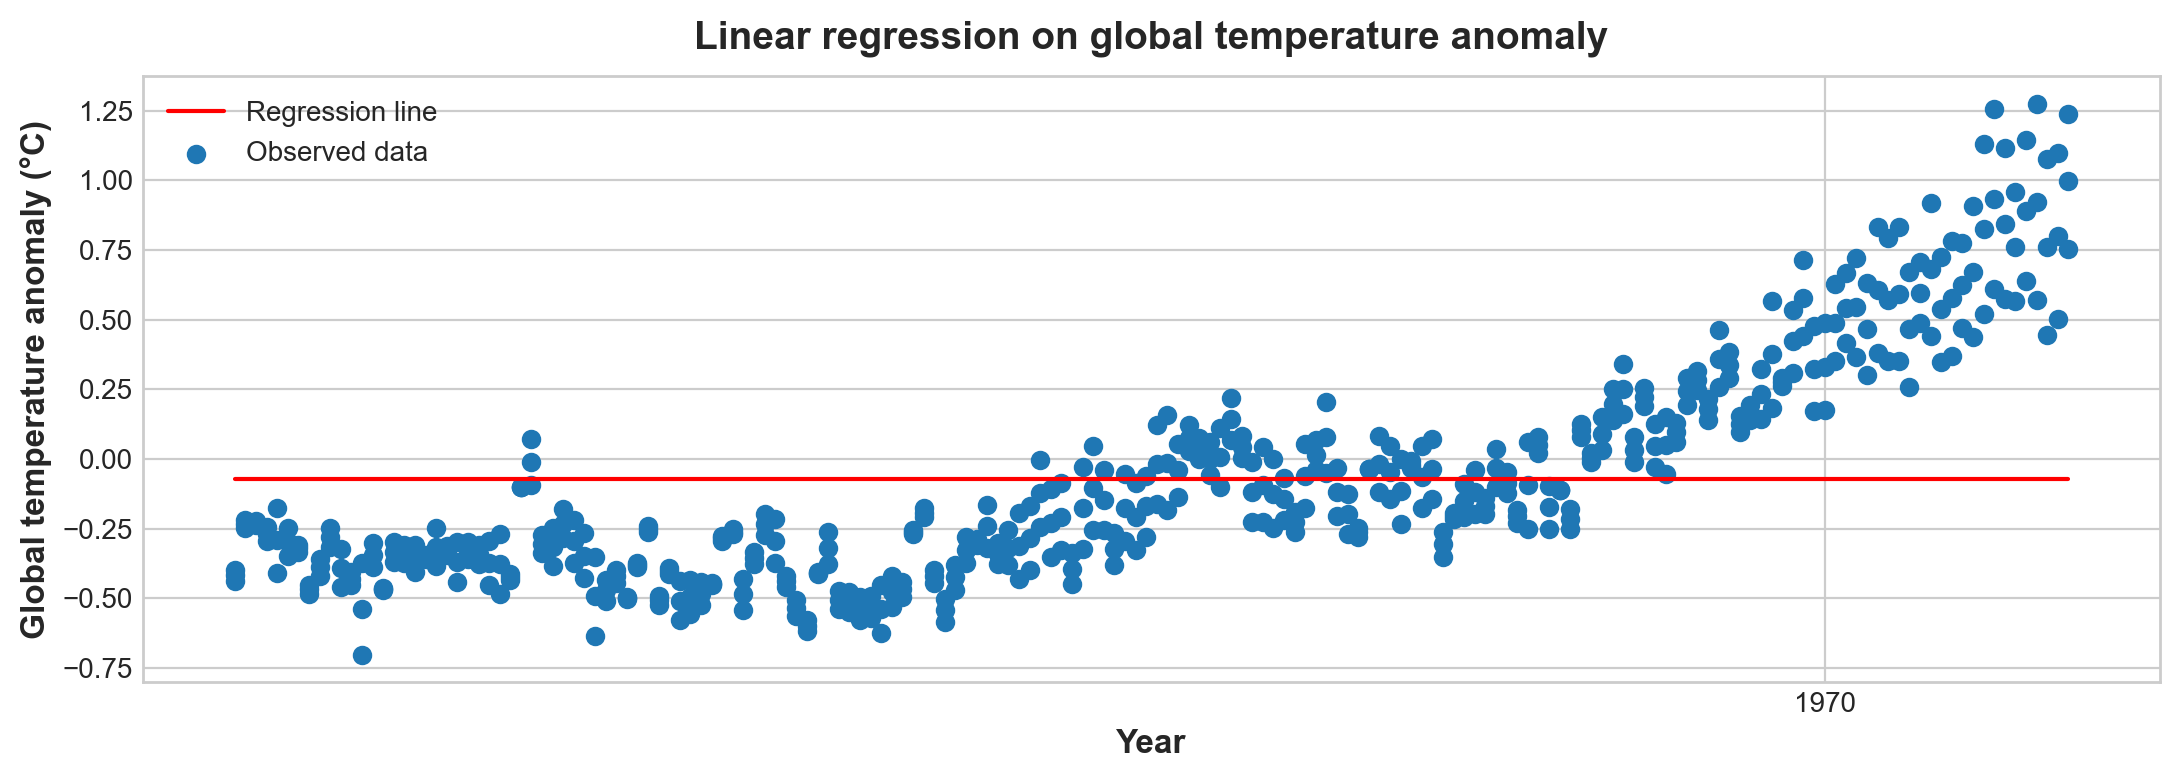

In [940]:
model = LinearRegression()
X1 = data1['Year'].dt.year.values.reshape(-1, 1) # Reshape year column to 2D array
y1 = data1['temp_anomaly'].values # Extract temp_anomaly column as 1D array
model.fit(X1, y1) # Train the model
y_pred1 = model.predict(X1) # Make predictions
#print(f'Linear regression equation: y = {model.coef_[0]:.4f} * x + {model.intercept_:.4f}')
#print(f'R-squared score: {model.score(X, y):.4f}')

# Plot the regression line
plt.plot(data1['Year'], y_pred1, color='red', label='Regression line')
plt.scatter(data1['Year'], data1['temp_anomaly'], label='Observed data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Linear regression on global temperature anomaly')
plt.legend()
plt.show()

In [945]:
# Train the model
model = LinearRegression()
model.fit(X1, y1)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred1 = pd.Series(model.predict(X1))
y_pred1

0     -0.072792
1     -0.072792
2     -0.072792
3     -0.072792
4     -0.072792
         ...   
517   -0.072792
518   -0.072792
519   -0.072792
520   -0.072792
521   -0.072792
Length: 522, dtype: float64

In [948]:
plt.plot(y_pred1, color='green', label='Predicted data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Predicted global temperature anomaly from 2020 to 2070')
plt.legend()
plt.show()